# Pandas Mastery Series
* Numerous questions designed to test data manipulation skills

## Table of Contents

* [Q1 - The Great Data Merge Maze](#chapter1) 
* [Q2 - Time Travel with Multi-Index](#chapter2) 
* [Q3 - The GroupBy Gauntlet](#chapter3) 
* [Q4 - Regex Riddles in Data Cleaning](#chapter4) 
* [Q5 - Speed Demon Data Manipulation](#chapter5) 
* [Q6 - Recursive Riddle](#chapter6)
* [Q7 - Statistician's Nightmare](#chapter7)
* [Q8 - Pivot Table Puzzles](#chapter8)
* [Q9 - Aggregation Aggravation](#chapter9)
* [Q10 - Visual Magic with Pandas](#chapter10) 
* [Q11 - Nested Data Labyrinth](#chapter11) 
* [Q12 - Async Adventures in Data](#chapter12) 
* [Q13 - Geo Pandas Adventure](#chapter13) 
* [Q14 - Network Nexus Analysis](#chapter14) 
* [Q15 - High Dimensional Hide and Seek](#chapter15) 
* [Q16 - Real-time Data Rush](#chapter16) 
* [Q17 - Machine Learning Preprocess Pandemonium](#chapter17) 
* [Q18 - Text Tango with Pandas](#chapter18) 
* [Q19 - Anomaly Detection Drama](#chapter19) 
* [Q20 - Imputation Imbroglio](#chapter20) 


## Q1 - The Great Data Merge Maze <a class="anchor" id="chapter1"></a>

Question: Welcome to the Great Data Merge Maze! You are given three datasets: customers, orders, and products. Your task is to merge these datasets to answer the following questions:

1. Which customers ordered which products and at what price?
2. Calculate the total amount spent by each customer.
3. Identify the top 2 customers who spent the most.
4. Determine which products were never ordered.
5. Find the customer who ordered the highest quantity of a single product.

Datasets:

* customers: Contains customer IDs and names.
* orders: Contains order IDs, customer IDs, product IDs, and order quantities.
* products: Contains product IDs, names, and prices.

Generate synthetic data for the datasets and merge them to find the answers.

In [1]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(0)

# Customers DataFrame
customers = pd.DataFrame({
    'customer_id': range(1, 11),
    'customer_name': ['Alice Apples', 'Bob Bananas', 'Charlie Cherries', 'David Dates', 'Eve Elderberries', 'Frank Figs', 'Grace Grapes', 'Hannah Honeydew', 'Ivy Iceberg', 'Jack Jicama']
})

# Products DataFrame
products = pd.DataFrame({
    'product_id': range(1, 11),
    'product_name': ['Widget Wonder', 'Gizmo Glitz', 'Doodad Delight', 'Thingamajig Thrill', 'Contraption Charm', 'Gadget Glow', 'Whatchamacallit Whimsy', 'Doohickey Dazzle', 'Whatsit Whiz', 'Gubbins Galore'],
    'product_price': np.random.uniform(10, 100, size=10).round(2)
})

# Orders DataFrame
orders = pd.DataFrame({
    'order_id': range(1, 21),
    'customer_id': np.random.choice(customers['customer_id'], size=20),
    'product_id': np.random.choice(products['product_id'], size=20),
    'order_quantity': np.random.randint(1, 10, size=20)
})

# Display the datasets
print("Customers DataFrame:")
print(customers.head(2), "\n")
print("Products DataFrame:")
print(products.head(2), "\n")
print("Orders DataFrame:")
print(orders.head(2))

Customers DataFrame:
   customer_id customer_name
0            1  Alice Apples
1            2   Bob Bananas 

Products DataFrame:
   product_id   product_name  product_price
0           1  Widget Wonder          59.39
1           2    Gizmo Glitz          74.37 

Orders DataFrame:
   order_id  customer_id  product_id  order_quantity
0         1            7           4               9
1         2            8           4               5


### Question 1.1 - Which customers ordered which products and at what price?

In [2]:
# Here I am looking for common columns between the dataframes and conclude its easiest 
# to merge the Customers and Products dataframes into the Orders dataframe

# Merge customers into orders
ord_cust_df = pd.merge(orders, customers, on='customer_id', how="left")

# Merge products into orders + customers
combined_df = pd.merge(ord_cust_df, products, on='product_id', how='left')

combined_df.head()

,order_id,customer_id,product_id,order_quantity,customer_name,product_name,product_price
0,1,7,4,9,Grace Grapes,Thingamajig Thrill,59.04
1,2,8,4,5,Hannah Honeydew,Thingamajig Thrill,59.04
2,3,8,8,2,Hannah Honeydew,Doohickey Dazzle,90.26
3,4,9,1,5,Ivy Iceberg,Widget Wonder,59.39
4,5,2,2,9,Bob Bananas,Gizmo Glitz,74.37


The resulting table answers question 1.1 by giving a clear way of seeing which customers ordered which products and at what price.

### Question 1.2 - Calculate the total amount spent by each customer.

In [3]:
# For question 1.2 first thing I notice is each order only have a single row so all I have to do to 
# calculate the total amount spent by each customer is to multiply order_quantity with product_price 
# for each order and add up the orders from the same person

# First off rename the dataframe for clearer readability 
df = combined_df

# Add new column order_sum
df['order_sum'] = df['order_quantity'] * df['product_price']

df.head()

,order_id,customer_id,product_id,order_quantity,customer_name,product_name,product_price,order_sum
0,1,7,4,9,Grace Grapes,Thingamajig Thrill,59.04,531.36
1,2,8,4,5,Hannah Honeydew,Thingamajig Thrill,59.04,295.20
2,3,8,8,2,Hannah Honeydew,Doohickey Dazzle,90.26,180.52
3,4,9,1,5,Ivy Iceberg,Widget Wonder,59.39,296.95
4,5,2,2,9,Bob Bananas,Gizmo Glitz,74.37,669.33


In [4]:
# Group by customer name and add up order_sum
customer_total = df.groupby('customer_name')['order_sum'].sum().reset_index()
customer_total.columns = ['customer_name', 'total sum spent']
customer_total

,customer_name,total sum spent
0,Alice Apples,549.09
1,Bob Bananas,1009.98
2,Charlie Cherries,296.95
3,David Dates,1050.13
4,Eve Elderberries,631.82
5,Frank Figs,346.02
6,Grace Grapes,531.36
7,Hannah Honeydew,475.72
8,Ivy Iceberg,1248.98
9,Jack Jicama,281.54


The table above answers question 1.2. 

### Question 1.3 - Identify the top 2 customers who spent the most.

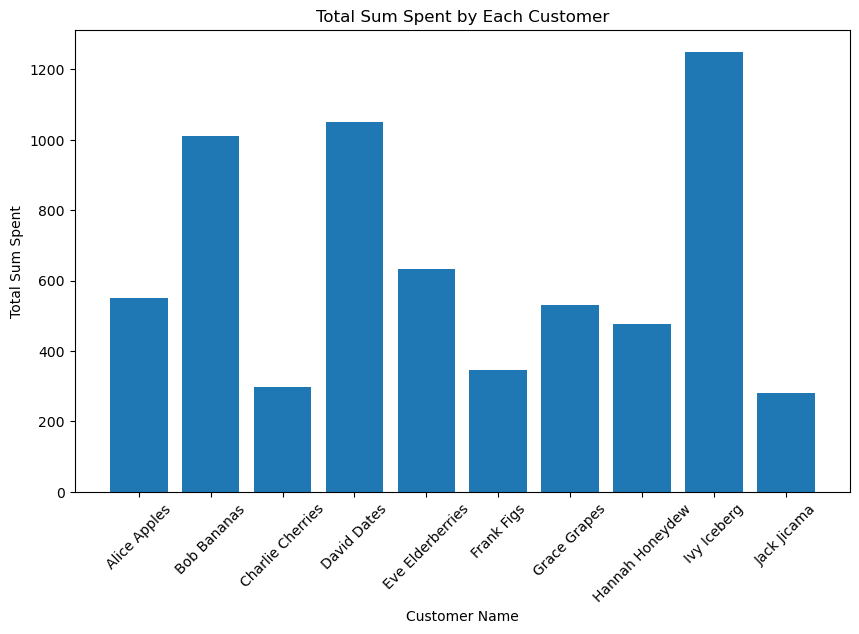

In [5]:
# For question 3 I find it easiest to just plot a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(customer_total['customer_name'], customer_total['total sum spent'])
plt.xlabel('Customer Name')
plt.ylabel('Total Sum Spent')
plt.title('Total Sum Spent by Each Customer')
plt.xticks(rotation=45)
plt.show()

The chart gives away that Ivy Iceberg and David Dates are the top 2 customers who spent the most. 

### Question 1.4 - Determine which products were never ordered.

In [6]:
# Question 1.4 is pretty straight forward, just find all unique products sold and 
# match that list against the products dataframe

# Find all unique products sold
products_sold = df['product_id'].unique()

# Match unique products sold to the products dataframe 
products_unsold = products[~products['product_id'].isin(products_sold)]
                           
print(products_unsold[['product_id', 'product_name']].to_string(index=False))

 product_id product_name
          9 Whatsit Whiz


Question 1.4: Only the product Whatsit Whiz has not been sold. 

### Question 1.5 - Find the customer who ordered the highest quantity of a single product.

In [7]:
# Question 1.5 I thought was very straight forward by sorting the dataframe by order_quantity but then I realized I also
# have to take into account that a customer could order the same products multiple times across different order_ids 

# Group orders by customer_id & product_id and sum up order_quantity
# Here I swapped customer_id & product_id to customer_name & product_name for a cleaner output
customer_prod_quant = df.groupby(['customer_name', 'product_name'])['order_quantity'].sum().reset_index()

# Locate the highest order_quantity
customer_prod_quant.loc[customer_prod_quant['order_quantity'].idxmax()]

customer_name       Ivy Iceberg
product_name      Widget Wonder
order_quantity               13
Name: 16, dtype: object

Question 1.5: Ivy Iceberg is the customer who ordered the highest quantity of a single product by buying 13 Widget Wonders.



## Q2 - Time Travel with Multi-Index <a class="anchor" id="chapter2"></a>

Question: Welcome to Time Travel with Multi-Index! You are given a multi-index time series dataset of sales data for different regions and product categories. Your task is to perform advanced time series analysis and manipulation to answer the following questions:

1. What is the total sales for each region and product category over time?
2. Calculate the moving average of sales for each region and product category.
3. Identify the region with the highest sales growth rate.
4. Determine the top-selling product category for each region.
5. Find the month with the highest overall sales.

Datasets:

sales_data: Contains multi-index (region, product_category) and columns (date, sales).

In [8]:
# Seed for reproducibility
np.random.seed(1)

# Generate date range
date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='M')

# Regions and product categories
regions = ['North Pole', 'South Pole', 'East Egg', 'Westworld']
product_categories = ['Gizmos', 'Widgets', 'Doodads', 'Thingamajigs']

# Generate synthetic sales data
data = []
for region in regions:
    for category in product_categories:
        sales = np.random.randint(1000, 5000, size=len(date_range))
        for date, sale in zip(date_range, sales):
            data.append([region, category, date, sale])

# Create DataFrame
sales_data = pd.DataFrame(data, columns=['Region', 'Product_Category', 'Date', 'Sales'])

# Set multi-index
sales_data.set_index(['Region', 'Product_Category', 'Date'], inplace=True)

# Display the dataset
print("Sales Data DataFrame:")
print(sales_data)

Sales Data DataFrame:
                                        Sales
Region     Product_Category Date             
North Pole Gizmos           2023-01-31   2061
                            2023-02-28   1235
                            2023-03-31   4980
                            2023-04-30   2096
                            2023-05-31   4839
...                                       ...
Westworld  Thingamajigs     2023-08-31   3224
                            2023-09-30   2590
                            2023-10-31   4087
                            2023-11-30   3949
                            2023-12-31   2425

[192 rows x 1 columns]


### Question 2.1 - What is the total sales for each region and product category over time?

In [9]:
# I can find total sales by grouping Region, Product_Category & Date, then sum up the sales
total_sales = sales_data.groupby(['Region', 'Product_Category', 'Date']).sum()

total_sales

Sales
Region    Product_Category Date             
East Egg  Doodads          2023-01-31   2393
                           2023-02-28   2869
                           2023-03-31   2795
                           2023-04-30   3944
                           2023-05-31   2277
...                                      ...
Westworld Widgets          2023-08-31   3464
                           2023-09-30   4212
                           2023-10-31   4265
                           2023-11-30   1606
                           2023-12-31   4644

[192 rows x 1 columns]

Question 2.1: This dataframe contains all data asked for and can be used for further analyzation and visualization.

### Question 2.2 - Calculate the moving average of sales for each region and product category.

In [10]:
# I can use the rolling() method to calculate this, currently set to calculate moving average over 3 months
moving_average_sales = total_sales.groupby(['Region', 'Product_Category'])['Sales'].rolling(window=3).mean()

# Specify name to new column
moving_average_sales.name = 'Moving Average'

# Reset index for better output
moving_average_sales = moving_average_sales.reset_index(level=[0,1])

# Drop duplicated columns
moving_average_sales = moving_average_sales.drop(moving_average_sales.columns[[0,1]], axis=1)

moving_average_sales

Moving Average
Region    Product_Category Date                      
East Egg  Doodads          2023-01-31             NaN
                           2023-02-28             NaN
                           2023-03-31     2685.666667
                           2023-04-30     3202.666667
                           2023-05-31     3005.333333
...                                               ...
Westworld Widgets          2023-08-31     4248.000000
                           2023-09-30     4136.000000
                           2023-10-31     3980.333333
                           2023-11-30     3361.000000
                           2023-12-31     3505.000000

[192 rows x 1 columns]

Question 2.2: A column for the moving average over 3 months is provided. The first two entries are NaN because there is not enough data to calculate those entries. 

### Question 2.3: Identify the region with the highest sales growth rate.

In [11]:
# Calculate the percentage change in total sales for each region
sales_growth = total_sales.groupby('Region').sum().pct_change().fillna(0)

# Identify the region with highest growth
highest_region = sales_growth['Sales'].idxmax()

highest_region

'North Pole'

The region with the highest sales growth rate is North Pole.

### Question 2.4: Determine the top-selling product category for each region.

In [12]:
# Group by Region and Product_Category, then sum the sales
region_category_sales = sales_data.groupby(['Region', 'Product_Category'])['Sales'].sum().reset_index()

# Identify the top-selling category for each region
top_selling_categories = region_category_sales.loc[region_category_sales.groupby('Region')['Sales'].idxmax()]

top_selling_categories

,Region,Product_Category,Sales
1,East Egg,Gizmos,38459
7,North Pole,Widgets,40393
10,South Pole,Thingamajigs,39617
13,Westworld,Gizmos,40665


Question 2.4: The table above gives the top-selling product category for each region

### Question 2.5: Find the month with the highest overall sales.

In [13]:
# Make a new column with year and month
sales_data['YearMonth'] = sales_data.index.get_level_values('Date').to_period('M')

# Group by YearMonth then sum the sales
monthly_sales = sales_data.groupby('YearMonth')['Sales'].sum().reset_index()

# Identify the month with the highest sales
best_month = monthly_sales.loc[monthly_sales['Sales'].idxmax()]

best_month

YearMonth    2023-05
Sales          57533
Name: 4, dtype: object

## Q3 - The GroupBy Gauntlet <a class="anchor" id="chapter3"></a>

Question: Welcome to the GroupBy Gauntlet! You are given a dataset of wacky wizard tournaments. Each tournament has multiple rounds, and wizards earn points in each round. Your task is to perform complex groupby operations to answer the following questions:

1. Calculate the total points for each wizard across all tournaments.
2. Identify the wizard with the highest average points per round.
3. Determine the tournament with the highest total points.
4. Find the wizard who won the most rounds (i.e., highest points in each round).
5. Calculate the average points per round for each tournament.
6. Determine the standard deviation of points for each wizard across all tournaments.
7. Identify the top 3 wizards with the most consistent performance (lowest standard deviation in points).
8. Calculate the cumulative points for each wizard across all tournaments over time.
9. Find the round in each tournament with the highest average points scored.
10. Determine the correlation between the number of rounds and total points scored for each wizard.

Datasets:

wizard_tournaments: Contains columns (tournament_id, round_id, wizard_name, points).

In [14]:
# Seed for reproducibility
np.random.seed(42)

# Generate synthetic data
tournament_ids = np.arange(1, 6)
round_ids = np.arange(1, 11)
wizard_names = ['Merlin', 'Gandalf', 'Harry', 'Voldemort', 'Saruman', 'Dumbledore', 'Hermione', 'Ron']

data = []
for tournament in tournament_ids:
    for round_id in round_ids:
        for wizard in wizard_names:
            points = np.random.randint(0, 101)
            data.append([tournament, round_id, wizard, points])

# Create DataFrame
wizard_tournaments = pd.DataFrame(data, columns=['tournament_id', 'round_id', 'wizard_name', 'points'])

# Display the dataset
print("Wizard Tournaments DataFrame:")
print(wizard_tournaments.head())

Wizard Tournaments DataFrame:
   tournament_id  round_id wizard_name  points
0              1         1      Merlin      51
1              1         1     Gandalf      92
2              1         1       Harry      14
3              1         1   Voldemort      71
4              1         1     Saruman      60


### Question 3.1: Calculate the total points for each wizard across all tournaments.

In [15]:
total_points_per_wizard = wizard_tournaments.groupby('wizard_name')['points'].sum().reset_index()

total_points_per_wizard

,wizard_name,points
0,Dumbledore,2428
1,Gandalf,2851
2,Harry,2346
3,Hermione,3091
4,Merlin,2488
5,Ron,2210
6,Saruman,2432
7,Voldemort,2152


### Question 3.2: Identify the wizard with the highest average points per round.

In [16]:
# Highest average would be the wizard with the most points overall
total_points_per_wizard = total_points_per_wizard.sort_values(by='points', ascending=False)

total_points_per_wizard.head(1)

,wizard_name,points
3,Hermione,3091


Question 3.2: Hermione is the wizard with the highest average points per round.

### Question 3.3: Determine the tournament with the highest total points.

In [17]:
# just groupby tournament id and sum the points
total_tournament = wizard_tournaments.groupby('tournament_id')['points'].sum().reset_index()

total_tournament = total_tournament.sort_values(by='points', ascending=False)

total_tournament.head(1)

,tournament_id,points
2,3,4074


Question 3.3: The 3rd tournament had the highest total points

### Question 3.4: Find the wizard who won the most rounds (i.e., highest points in each round).

In [18]:
# groupby tournament id and round id, and find the winner (max points) with .loc and idxmax()
round_winners = wizard_tournaments.loc[wizard_tournaments.groupby(['tournament_id', 'round_id'])['points'].idxmax()]

# now with the group winner for every round just count the wins for each wizard
rounds_won_per_wizard = round_winners['wizard_name'].value_counts().reset_index()
rounds_won_per_wizard.columns = ['wizard_name', 'rounds_won']

rounds_won_per_wizard

,wizard_name,rounds_won
0,Gandalf,10
1,Hermione,9
2,Dumbledore,8
3,Merlin,8
4,Ron,5
5,Saruman,4
6,Voldemort,3
7,Harry,3


Question 3.4: The wizard Gandalf won the most rounds with 10 rounds won.

### Question 3.5: Calculate the average points per round for each tournament.

In [19]:
# start by grouping tournament_id and round_id and sum points
round_points = wizard_tournaments.groupby(['tournament_id', 'round_id'])['points'].sum().reset_index()

# do a new groupby on tournament id and take the mean of the points
avg_round_points = round_points.groupby('tournament_id')['points'].mean().reset_index()

avg_round_points

,tournament_id,points
0,1,391.8
1,2,397.8
2,3,407.4
3,4,401.3
4,5,401.5


### Question 3.6: Determine the standard deviation of points for each wizard across all tournaments.

In [20]:
# here i can utilize the std() function to get the standard deviation
std_per_wizard = wizard_tournaments.groupby('wizard_name')['points'].std().reset_index()

std_per_wizard.columns = ['wizard_name', 'std_points']

std_per_wizard

,wizard_name,std_points
0,Dumbledore,28.790701
1,Gandalf,31.099242
2,Harry,27.568719
3,Hermione,28.769095
4,Merlin,29.651417
5,Ron,30.809487
6,Saruman,30.693854
7,Voldemort,30.334839


### Question 3.7: Identify the top 3 wizards with the most consistent performance (lowest standard deviation in points).

In [21]:
# sort the table from the previous task and take the lowest three
std_per_wizard = std_per_wizard.sort_values(by='std_points', ascending=True)

std_per_wizard.head(3)

,wizard_name,std_points
2,Harry,27.568719
3,Hermione,28.769095
0,Dumbledore,28.790701


### Question 3.8: Calculate the cumulative points for each wizard across all tournaments over time.

In [22]:
# here i can utilize the cumsum() function to calculate the cumulative sum
wizard_cumsum = wizard_tournaments.sort_values(by=['wizard_name', 'tournament_id', 'round_id'])

wizard_cumsum['cumulative_points'] = wizard_cumsum.groupby('wizard_name')['points'].cumsum()

wizard_cumsum

,tournament_id,round_id,wizard_name,points,cumulative_points
5,1,1,Dumbledore,20,20
13,1,2,Dumbledore,2,22
21,1,3,Dumbledore,63,85
29,1,4,Dumbledore,48,133
37,1,5,Dumbledore,61,194
...,...,...,...,...,...
363,5,6,Voldemort,60,1930
371,5,7,Voldemort,43,1973
379,5,8,Voldemort,23,1996
387,5,9,Voldemort,62,2058


### Question 3.9: Find the round in each tournament with the highest average points scored.

In [23]:
# first group by tournament id and round id to calculate the average points scored in each round
avg_points_per_round = wizard_tournaments.groupby(['tournament_id', 'round_id'])['points'].mean().reset_index()

# identify highest average round within each tournament
highest_avg_points_round = avg_points_per_round.loc[avg_points_per_round.groupby('tournament_id')['points'].idxmax()]

highest_avg_points_round

,tournament_id,round_id,points
0,1,1,59.500
17,2,8,68.500
20,3,1,65.125
39,4,10,73.000
48,5,9,68.500


## Q4 - Regex Riddles in Data Cleaning <a class="anchor" id="chapter4"></a>

Question: Welcome to Regex Riddles in Data Cleaning! You are given a dataset containing customer reviews for various fantastical products. However, the data is quite messy with inconsistent formats, typos, and random special characters. Your task is to use regular expressions and other data cleaning techniques to answer the following questions:

1. Standardize the format of email addresses.
2. Correct common typos in product names.
3. Remove any special characters from the reviews.
4. Extract and count the number of reviews mentioning the word "magic".
5. Identify the top 3 most frequently mentioned products in the reviews.

Datasets:

customer_reviews: Contains columns (review_id, email, product_name, review_text).

In [24]:
# Seed for reproducibility
np.random.seed(24)

# Generate synthetic data
review_ids = np.arange(1, 21)
emails = ['user{}@example.com'.format(i) for i in range(1, 21)]
emails = [email.replace('user', 'UsEr-') if i % 2 == 0 else email for i, email in enumerate(emails)]
product_names = ['Magic Wand', 'Potion', 'Spell Book', 'Crystal Ball', 'Flying Broom']
typos = ['Magic Wnd', 'Potin', 'Spell Bok', 'Crystal Bll', 'Flyng Broom']

reviews = [
    "This {} is awesome! It's pure magic!".format(np.random.choice(product_names + typos))
    for _ in review_ids
]
special_characters = ['!', '@', '#', '$', '%', '^', '&', '*', '(', ')']
reviews = [
    review + ' ' + ''.join(np.random.choice(special_characters, 3))
    for review in reviews
]

# Create DataFrame
customer_reviews = pd.DataFrame({
    'review_id': review_ids,
    'email': emails,
    'product_name': [np.random.choice(product_names + typos) for _ in review_ids],
    'review_text': reviews
})

# Display the dataset
print("Customer Reviews DataFrame:")
print(customer_reviews)

Customer Reviews DataFrame:
    review_id                email  product_name  \
0           1   UsEr-1@example.com  Flying Broom   
1           2    user2@example.com  Flying Broom   
2           3   UsEr-3@example.com    Spell Book   
3           4    user4@example.com    Spell Book   
4           5   UsEr-5@example.com  Crystal Ball   
5           6    user6@example.com    Magic Wand   
6           7   UsEr-7@example.com     Spell Bok   
7           8    user8@example.com         Potin   
8           9   UsEr-9@example.com    Magic Wand   
9          10   user10@example.com    Spell Book   
10         11  UsEr-11@example.com   Flyng Broom   
11         12   user12@example.com   Crystal Bll   
12         13  UsEr-13@example.com     Magic Wnd   
13         14   user14@example.com    Magic Wand   
14         15  UsEr-15@example.com     Magic Wnd   
15         16   user16@example.com  Flying Broom   
16         17  UsEr-17@example.com  Flying Broom   
17         18   user18@example.com  

## Question 4.1: Standardize the format of email addresses.

In [25]:
# standardize the format by using all lower case letters
customer_reviews['email'] = customer_reviews['email'].str.lower()

customer_reviews.email.head()

0    user-1@example.com
1     user2@example.com
2    user-3@example.com
3     user4@example.com
4    user-5@example.com
Name: email, dtype: object

## Question 4.2: Correct common typos in product names.

In [26]:
# the common typos i can see are: Spell Bok, Magic Wnd, Potin, Crystal Bll, Flyng Broom

# correct the typos using dictionary and replace
typos_correction = {
    'Spell Bok': 'Spell Book',
    'Magic Wnd': 'Magic Wand',
    'Potin': 'Potion',
    'Crystal Bll': 'Crystal Ball',
    'Flyng Broom': 'Flying Broom'
}

customer_reviews['product_name'] = customer_reviews['product_name'].replace(typos_correction)

customer_reviews.tail()

,review_id,email,product_name,review_text
15,16,user16@example.com,Flying Broom,This Spell Book is awesome! It's pure magic! )!@
16,17,user-17@example.com,Flying Broom,This Spell Bok is awesome! It's pure magic! &!!
17,18,user18@example.com,Potion,This Spell Bok is awesome! It's pure magic! #!(
18,19,user-19@example.com,Magic Wand,This Flyng Broom is awesome! It's pure magic! &^$
19,20,user20@example.com,Crystal Ball,This Crystal Ball is awesome! It's pure magic!...


## Question 4.3: Remove any special characters from the reviews.

In [27]:
# this can be solves by simply replacing the special characters with '' (nothing)
customer_reviews['review_text'] = customer_reviews['review_text'].str.replace(r'[^\w\s]', '', regex=True)

customer_reviews.review_text.head()

0      This Spell Book is awesome Its pure magic 
1    This Crystal Ball is awesome Its pure magic 
2      This Magic Wand is awesome Its pure magic 
3       This Spell Bok is awesome Its pure magic 
4          This Potion is awesome Its pure magic 
Name: review_text, dtype: object

### Question 4.4: Extract and count the number of reviews mentioning the word "magic".

In [28]:
# here i can identify the word Magic with str.contains and count the boolean results
contains_magic = customer_reviews['review_text'].str.contains(r'\bmagic\b', case=False, regex=True)

contains_magic.sum()

20

### Question 4.5: Identify the top 3 most frequently mentioned products in the reviews.

In [29]:
# i can use the collections library to do this

# List of product names and typos
product_names_and_typos = ['Magic Wand', 'Potion', 'Spell Book', 'Crystal Ball', 'Flying Broom',
                           'Magic Wnd', 'Potin', 'Spell Bok', 'Crystal Bll', 'Flyng Broom']

from collections import Counter
product_mention_counts = Counter()

# do a count for each product name
for product in product_names_and_typos:
    product_mention_counts[product] = customer_reviews['review_text'].str.contains(product, case=False).sum()

# output the 3 most mentioned products     
product_mention_counts.most_common(3)

[('Crystal Ball', 5), ('Spell Bok', 4), ('Potion', 3)]

In [30]:
product_mention_counts

Counter({'Magic Wand': 1,
         'Potion': 3,
         'Spell Book': 3,
         'Crystal Ball': 5,
         'Flying Broom': 2,
         'Magic Wnd': 0,
         'Potin': 0,
         'Spell Bok': 4,
         'Crystal Bll': 0,
         'Flyng Broom': 2})

## Q5 - Speed Demon Data Manipulation <a class="anchor" id="chapter5"></a>

Question: Welcome to Speed Demon Data Manipulation! You are given a dataset of various fantastical creatures and their race times in different races. The data is enormous, and you need to optimize your data manipulation techniques to answer the following questions:

1. Calculate the average race time for each creature.
2. Identify the top 3 fastest creatures based on their average race time.
3. Determine the race with the highest average race time.
4. Find the creature with the most race wins (i.e., shortest time in each race).
5. Calculate the total number of races each creature has participated in.

Datasets:

race_times: Contains columns (race_id, creature_name, race_time).

In [31]:
# Seed for reproducibility
np.random.seed(101)

# Generate synthetic data
race_ids = np.arange(1, 101)
creature_names = ['Speedy Snail', 'Dashy Dragon', 'Rapid Rabbit', 'Fleet-Footed Fairy', 'Quick Quokka', 'Swift Sphinx', 'Nimble Niffler', 'Brisk Banshee']

data = []
for race in race_ids:
    for creature in creature_names:
        race_time = np.random.uniform(10, 120)  # Race times in seconds
        data.append([race, creature, race_time])

# Create DataFrame
race_times = pd.DataFrame(data, columns=['race_id', 'creature_name', 'race_time'])

# Display the dataset
print("Race Times DataFrame:")
print(race_times.head())

Race Times DataFrame:
   race_id       creature_name  race_time
0        1        Speedy Snail  66.803849
1        1        Dashy Dragon  72.773435
2        1        Rapid Rabbit  13.132165
3        1  Fleet-Footed Fairy  28.867382
4        1        Quick Quokka  85.380468


### Question 5.1: Calculate the average race time for each creature.

In [32]:
# use groupby and mean()
avg_race_time = race_times.groupby('creature_name')['race_time'].mean().reset_index()

avg_race_time

,creature_name,race_time
0,Brisk Banshee,66.305692
1,Dashy Dragon,65.141639
2,Fleet-Footed Fairy,67.195204
3,Nimble Niffler,63.375094
4,Quick Quokka,66.981233
5,Rapid Rabbit,68.910263
6,Speedy Snail,64.065256
7,Swift Sphinx,62.625939


### Question 5.2: Identify the top 3 fastest creatures based on their average race time.

In [33]:
# just sort the table from the previous task and output the top 3
avg_race_time.sort_values(by='race_time', ascending=False).head(3)

,creature_name,race_time
5,Rapid Rabbit,68.910263
2,Fleet-Footed Fairy,67.195204
4,Quick Quokka,66.981233


### Question 5.3: Determine the race with the highest average race time.

In [34]:
# calculate average race time for each race
avg_race_times = race_times.groupby('race_id')['race_time'].mean().reset_index()

avg_race_times.columns = ['race_id', 'avg_race_time']

# find race with highest average race time
highest_avg_time = avg_race_times.loc[avg_race_times['avg_race_time'].idxmax()]

highest_avg_time

race_id          55.000000
avg_race_time    86.088825
Name: 54, dtype: float64

### Question 5.4: Find the creature with the most race wins (i.e., shortest time in each race).

In [35]:
# find the winner of each race
race_winners = race_times.loc[race_times.groupby('race_id')['race_time'].idxmin()]

# count each creature's wins
win_counts = race_winners['creature_name'].value_counts().reset_index()
win_counts.columns = ['creature_name', 'win_count']

win_counts.head(1)

,creature_name,win_count
0,Fleet-Footed Fairy,16


### Question 5.5: Calculate the total number of races each creature has participated in.

In [36]:
# just count races for each creature
race_times.groupby('creature_name')['race_id'].count()

creature_name
Brisk Banshee         100
Dashy Dragon          100
Fleet-Footed Fairy    100
Nimble Niffler        100
Quick Quokka          100
Rapid Rabbit          100
Speedy Snail          100
Swift Sphinx          100
Name: race_id, dtype: int64

## Q6 - Recursive Riddle <a class="anchor" id="chapter6"></a>

Question: Welcome to the Recursive Riddle! You are given a dataset containing information about a series of magical quests and the hierarchical structure of tasks within each quest. Each task may depend on the completion of other tasks. Your task is to use recursive techniques to answer the following questions:

1. Determine the total number of tasks in each quest.
2. Identify the task that has the most dependencies in each quest.
3. Calculate the total time required to complete each quest.
4. Find the deepest level of task dependency in each quest.
5. List the tasks in each quest in the order they should be completed.

Datasets:

magical_quests: Contains columns (quest_id, task_id, task_name, depends_on, time_required).

In [37]:
# Seed for reproducibility
np.random.seed(202)

# Generate synthetic data
quest_ids = np.arange(1, 6)
task_ids = np.arange(1, 21)
task_names = ['Gather Ingredients', 'Cast Spell', 'Brew Potion', 'Enchant Object', 'Defeat Monster', 'Rescue Ally', 'Find Hidden Path', 'Solve Puzzle', 'Forge Weapon', 'Tame Beast']
depends_on_options = [None] + list(task_ids)

data = []
for quest in quest_ids:
    num_tasks = np.random.randint(5, 10)
    tasks = np.random.choice(task_ids, num_tasks, replace=False)
    for task in tasks:
        depends_on = np.random.choice(depends_on_options, np.random.randint(0, 3)).tolist() if np.random.rand() > 0.3 else None
        time_required = np.random.randint(1, 5) * 10  # Time required in minutes
        data.append([quest, task, np.random.choice(task_names), depends_on, time_required])

# Create DataFrame
magical_quests = pd.DataFrame(data, columns=['quest_id', 'task_id', 'task_name', 'depends_on', 'time_required'])

# Convert lists of single elements to integers and empty lists to None
magical_quests['depends_on'] = magical_quests['depends_on'].apply(lambda x: x if isinstance(x, list) and x else None)

# Display the dataset
print("Magical Quests DataFrame:")
print(magical_quests.head())

Magical Quests DataFrame:
   quest_id  task_id         task_name depends_on  time_required
0         1       11    Enchant Object       None             40
1         1       14  Find Hidden Path       [20]             10
2         1        3        Tame Beast       None             10
3         1       12        Tame Beast       None             10
4         1       15        Tame Beast    [5, 16]             10


### Question 6.1: Determine the total number of tasks in each quest.

In [38]:
tasks_per_quest = magical_quests.groupby('quest_id')['task_id'].count().reset_index()
tasks_per_quest.columns = ['quest_id', 'total_tasks']
tasks_per_quest

,quest_id,total_tasks
0,1,8
1,2,8
2,3,9
3,4,8
4,5,8


### Question 6.2: Identify the task that has the most dependencies in each quest.

In [39]:
# make new column with number of dependencies as depends_on is a list
magical_quests['num_dependencies'] = magical_quests['depends_on'].apply(lambda x: len(x) if isinstance(x, list) else 0)

magical_quests.loc[magical_quests.groupby('quest_id')['num_dependencies'].idxmax()]

,quest_id,task_id,task_name,depends_on,time_required,num_dependencies
4,1,15,Tame Beast,"[5, 16]",10,2
8,2,12,Solve Puzzle,[None],30,1
17,3,10,Enchant Object,"[3, 3]",30,2
27,4,10,Defeat Monster,"[13, 10]",40,2
33,5,7,Gather Ingredients,"[4, 16]",10,2


### Question 6.3: Calculate the total time required to complete each quest.

In [40]:
total_time = magical_quests.groupby('quest_id')['time_required'].sum().reset_index()
total_time.columns = ['quest_id', 'total_time_required']
total_time

,quest_id,total_time_required
0,1,150
1,2,220
2,3,200
3,4,250
4,5,180


### Question 6.4: Find the deepest level of task dependency in each quest.

In [41]:
# this question is a bit more work as a quest can depend on a quest that can depend on another quest and so on
# i will use a DFS approach here

# dictionary to represent the task dependencies for each quest
dependency_dict = {}
for _, row in magical_quests.iterrows():
    quest_id = row['quest_id']
    task_id = row['task_id']
    depends_on = row['depends_on']
        
    if quest_id not in dependency_dict:
        dependency_dict[quest_id] = {}
    
    dependency_dict[quest_id][task_id] = depends_on if isinstance(depends_on, list) else []

In [42]:
# recursive function for DFS
def find_dependency_depth(quest_dict, task_id, visited):
    if task_id not in quest_dict or not quest_dict[task_id]:
        return 0
    
    if task_id in visited:
        return 0
    
    visited.add(task_id)
    max_depth = 0
    for dep in quest_dict[task_id]:
        max_depth = max(max_depth, find_dependency_depth(quest_dict, dep, visited))
    visited.remove(task_id)
    
    return max_depth + 1

In [43]:
deepest_levels = []
for quest_id, quest_dict in dependency_dict.items():
    max_depth = 0
    for task_id in quest_dict:
        max_depth = max(max_depth, find_dependency_depth(quest_dict, task_id, set()))
    deepest_levels.append([quest_id, max_depth])
    
pd.DataFrame(deepest_levels, columns=['quest_id', 'deepest_dependecy_lvl'])

,quest_id,deepest_dependecy_lvl
0,1,2
1,2,1
2,3,3
3,4,2
4,5,1


### Question 6.5: List the tasks in each quest in the order they should be completed.

In [44]:
from collections import defaultdict
# helper function to build dependency_graph
def build_dependency_graph(df):
    graph = defaultdict(list)
    time_required = {}
    for _, row in df.iterrows():
        graph[row['task_id']] = row['depends_on'] if row['depends_on'] is not None else []
        time_required[row['task_id']] = row['time_required']
    return graph, time_required

# list the tasks in each quest in the order they should be completed
def find_order(task_id, graph, visited=None):
    if visited is None:
        visited = set()
    if task_id in visited:
        return []
    visited.add(task_id)
    order = []
    for dep in graph[task_id]:
        if dep in graph:
            order.extend(find_order(dep, graph, visited))
    return order + [task_id]

# find task order for each quest
task_orders = []
for quest, group in magical_quests.groupby('quest_id'):
    graph, _ = build_dependency_graph(group)
    all_orders = []
    for task_id in group['task_id']:
        all_orders.extend(find_order(task_id, graph))
    unique_orders = list(dict.fromkeys(all_orders))  # Remove duplicates while preserving order
    for i, t in enumerate(unique_orders):
        task_orders.append([quest, t, i])


# output the orders
task_orders_df = pd.DataFrame(task_orders, columns=['quest_id', 'task_id', 'order']).sort_values(by=['quest_id', 'order'])
ordered_tasks = pd.merge(task_orders_df, magical_quests[['quest_id', 'task_id', 'task_name']], on=['quest_id', 'task_id'])

print("Tasks in Each Quest in the Order They Should Be Completed")
print(ordered_tasks[['quest_id', 'task_name', 'order']])

Tasks in Each Quest in the Order They Should Be Completed
    quest_id           task_name  order
0          1      Enchant Object      0
1          1      Enchant Object      1
2          1    Find Hidden Path      2
3          1          Tame Beast      3
4          1          Tame Beast      4
5          1          Tame Beast      5
6          1  Gather Ingredients      6
7          1          Cast Spell      7
8          2        Solve Puzzle      0
9          2    Find Hidden Path      1
10         2        Solve Puzzle      2
11         2          Cast Spell      3
12         2  Gather Ingredients      4
13         2         Rescue Ally      5
14         2        Solve Puzzle      6
15         2         Rescue Ally      7
16         3          Cast Spell      0
17         3         Rescue Ally      1
18         3         Rescue Ally      2
19         3          Cast Spell      3
20         3      Enchant Object      4
21         3          Cast Spell      5
22         3      Defe

## Q7 - Statistician's Nightmare <a class="anchor" id="chapter7"></a>

Question: Welcome to the Statistician's Nightmare! You are given a dataset of various magical creatures and their bizarre daily activities. The data is filled with quirky statistics and unusual measures. Your task is to perform statistical analysis to answer the following questions:

1. Calculate the mean, median, and mode of the hours each creature spends on different activities.
2. Identify the creature with the highest variance in activity hours.
3. Determine the correlation between the number of magical spells cast and the hours spent on activities.
4. Find outliers in the dataset based on activity hours.
5. Perform a hypothesis test to determine if the average hours spent by creatures on "Flying" is different from "Potion Making."

Datasets:

creature_activities: Contains columns (creature_id, creature_name, activity, hours, spells_cast).

In [45]:
from scipy import stats

# Seed for reproducibility
np.random.seed(303)

# Generate synthetic data
creature_ids = np.arange(1, 21)
creature_names = ['Frodo Frog', 'Gimli Gnome', 'Luna Leprechaun', 'Percy Pixie', 'Trevor Troll']
activities = ['Flying', 'Potion Making', 'Spell Casting', 'Herb Gathering', 'Treasure Hunting']
hours_options = np.arange(0, 25)
spells_cast_options = np.arange(0, 101)

data = []
for creature in creature_ids:
    creature_name = np.random.choice(creature_names)
    for activity in activities:
        hours = np.random.choice(hours_options)
        spells_cast = np.random.choice(spells_cast_options)
        data.append([creature, creature_name, activity, hours, spells_cast])

# Create DataFrame
creature_activities = pd.DataFrame(data, columns=['creature_id', 'creature_name', 'activity', 'hours', 'spells_cast'])

# Display the dataset
print("Creature Activities DataFrame:")
print(creature_activities.head())

Creature Activities DataFrame:
   creature_id creature_name          activity  hours  spells_cast
0            1   Percy Pixie            Flying     18            1
1            1   Percy Pixie     Potion Making      4           21
2            1   Percy Pixie     Spell Casting     12           38
3            1   Percy Pixie    Herb Gathering     10           72
4            1   Percy Pixie  Treasure Hunting     18           30


### Question 7.1: Calculate the mean, median, and mode of the hours each creature spends on different activities.

In [46]:
# calculations
mean_hours = creature_activities.groupby('creature_name')['hours'].mean()
median_hours = creature_activities.groupby('creature_name')['hours'].median()
mode_hours = creature_activities.groupby('creature_name')['hours'].agg(lambda x: x.mode()[0])

# output
print("Mean Hours:")
print(mean_hours)
print("\nMedian Hours:")
print(median_hours)
print("\nMode Hours:")
print(mode_hours)

Mean Hours:
creature_name
Frodo Frog         11.950000
Gimli Gnome        12.400000
Luna Leprechaun    11.966667
Percy Pixie        12.085714
Trevor Troll       14.600000
Name: hours, dtype: float64

Median Hours:
creature_name
Frodo Frog         13.5
Gimli Gnome        10.0
Luna Leprechaun    12.0
Percy Pixie        12.0
Trevor Troll       18.0
Name: hours, dtype: float64

Mode Hours:
creature_name
Frodo Frog         14
Gimli Gnome         9
Luna Leprechaun    18
Percy Pixie         6
Trevor Troll       18
Name: hours, dtype: int32


### Question 7.2: Identify the creature with the highest variance in activity hours.

In [47]:
# get variance of each creature
var_hours = creature_activities.groupby('creature_name')['hours'].var()

# find creature with highest var and the var value
highest_var = var_hours.idxmax()
highest_var_value = var_hours.max()

# output
print(f"Creature with highest variance in activity hours: {highest_var}, with variance: {highest_var_value}")

Creature with highest variance in activity hours: Luna Leprechaun, with variance: 55.8264367816092


### Question 7.3: Determine the correlation between the number of magical spells cast and the hours spent on activities.

In [48]:
# calculate correlation coefficient between 'hours' and 'spells_cast'
correlation = creature_activities['hours'].corr(creature_activities['spells_cast'])

print(f"Correlation between spells cast and hours spent is: {correlation}")

Correlation between spells cast and hours spent is: 0.10821370480526496


### Question 7.4: Find outliers in the dataset based on activity hours.

In [49]:
# ill find outliers using the Interquartile Range (IQR) method

# calculate 25th and 75th percentile
Q1 = creature_activities['hours'].quantile(0.25)
Q3 = creature_activities['hours'].quantile(0.75)

# calculate IQR
iqr = Q3 - Q1

# define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr

# identify outliers
outliers = creature_activities[(creature_activities['hours'] < lower_bound) | (creature_activities['hours'] > upper_bound)]

# output
outliers

,creature_id,creature_name,activity,hours,spells_cast


The empty dataframe tells me that based on the IQR method there are no outliers in this data. 

### Question 7.5: Perform a hypothesis test to determine if the average hours spent by creatures on "Flying" is different from "Potion Making."

In [50]:
# extract the hours spent on flying and potion making
flying_hours = creature_activities[creature_activities['activity'] == 'Flying']['hours']
pm_hours = creature_activities[creature_activities['activity'] == 'Potion Making']['hours']

# perform two-sample t-test (with scipy.stats.ttest_ind)
t_stat, p_value = stats.ttest_ind(flying_hours, pm_hours, equal_var=False)

# output
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The average hours spent on 'Flying' is different from 'Potion Making'.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average hours spent on 'Flying' and 'Potion Making'.")

T-statistic: -1.33
P-value: 0.1916
Fail to reject the null hypothesis: No significant difference in average hours spent on 'Flying' and 'Potion Making'.


## Q8 - Pivot Table Puzzles <a class="anchor" id="chapter8"></a>

Question: Welcome to Pivot Table Puzzles! You are given a dataset of whimsical workshops attended by various mythical creatures. Each creature attends multiple workshops, and you need to analyze their attendance and performance. Your task is to use pivot tables to answer the following questions:

1. Create a pivot table showing the total hours attended by each creature for each workshop.
2. Calculate the average score of each creature for each workshop.
3. Identify the workshop with the highest average score.
4. Determine the total number of workshops attended by each creature.
5. Find the creature with the highest total score across all workshops.

Datasets:

workshop_attendance: Contains columns (creature_id, creature_name, workshop_name, hours_attended, score).

In [51]:
# Seed for reproducibility
np.random.seed(404)

# Generate synthetic data
creature_ids = np.arange(1, 21)
creature_names = ['Unicorn Ulysses', 'Phoenix Phoebe', 'Dragon Draco', 'Goblin Greta', 'Elf Elrond']
workshops = ['Wand Making', 'Spell Weaving', 'Potion Brewing', 'Crystal Gazing', 'Herbology']
hours_options = np.arange(1, 11)
score_options = np.arange(50, 101)

data = []
for creature in creature_ids:
    creature_name = np.random.choice(creature_names)
    num_workshops = np.random.randint(1, len(workshops) + 1)
    attended_workshops = np.random.choice(workshops, num_workshops, replace=False)
    for workshop in attended_workshops:
        hours_attended = np.random.choice(hours_options)
        score = np.random.choice(score_options)
        data.append([creature, creature_name, workshop, hours_attended, score])

# Create DataFrame
workshop_attendance = pd.DataFrame(data, columns=['creature_id', 'creature_name', 'workshop_name', 'hours_attended', 'score'])

# Display the dataset
print("Workshop Attendance DataFrame:")
print(workshop_attendance.head())

Workshop Attendance DataFrame:
   creature_id   creature_name   workshop_name  hours_attended  score
0            1      Elf Elrond     Wand Making               2     57
1            1      Elf Elrond  Potion Brewing               3     54
2            1      Elf Elrond   Spell Weaving               8     61
3            2  Phoenix Phoebe  Potion Brewing               4     60
4            3    Dragon Draco  Crystal Gazing               3     85


### Question 8.1: Create a pivot table showing the total hours attended by each creature for each workshop.

In [52]:
pivot_table = workshop_attendance.pivot_table(
    index='creature_name',
    columns='workshop_name',
    values='hours_attended',
    aggfunc='sum',
    fill_value=0
)

pivot_table

workshop_name,Crystal Gazing,Herbology,Potion Brewing,Spell Weaving,Wand Making
creature_name,,,,,
Dragon Draco,14,10,11,18,12
Elf Elrond,8,14,14,18,12
Goblin Greta,13,25,4,16,11
Phoenix Phoebe,0,16,14,9,0
Unicorn Ulysses,0,20,10,8,5


### Question 8.2: Calculate the average score of each creature for each workshop.

In [53]:
pivot_table_avg_score = workshop_attendance.pivot_table(
    index='creature_name', 
    columns='workshop_name', 
    values='score', 
    aggfunc='mean',
    fill_value=0
)

pivot_table_avg_score

workshop_name,Crystal Gazing,Herbology,Potion Brewing,Spell Weaving,Wand Making
creature_name,,,,,
Dragon Draco,70.333333,51.000000,85.0,77.000000,61.666667
Elf Elrond,62.000000,91.000000,57.0,71.333333,70.333333
Goblin Greta,67.666667,79.500000,77.0,82.000000,80.000000
Phoenix Phoebe,0.000000,69.333333,68.5,81.000000,0.000000
Unicorn Ulysses,0.000000,57.333333,61.0,91.500000,55.000000


### Question 8.3: Identify the workshop with the highest average score.

In [54]:
workshop_avg_scores = workshop_attendance.pivot_table(
    index='workshop_name', 
    values='score', 
    aggfunc='mean'
)

# identify the workshop with the highest average score
highest_avg_name = workshop_avg_scores['score'].idxmax()
highest_avg_score = workshop_avg_scores['score'].max()

print(f"{highest_avg_name} - {highest_avg_score}")

Spell Weaving - 79.36363636363636


### Question 8.4: Determine the total number of workshops attended by each creature.

In [55]:
pivot_table_workshop_count = workshop_attendance.pivot_table(
    index='creature_name', 
    values='workshop_name', 
    aggfunc='count'
)
pivot_table_workshop_count = pivot_table_workshop_count.reset_index()
pivot_table_workshop_count.columns = ['creature_name', 'workshops_attended']
pivot_table_workshop_count

,creature_name,workshops_attended
0,Dragon Draco,12
1,Elf Elrond,12
2,Goblin Greta,13
3,Phoenix Phoebe,6
4,Unicorn Ulysses,7


### Question 8.5: Find the creature with the highest total score across all workshops.

In [56]:
pivot_table_total_score = workshop_attendance.pivot_table(
    index='creature_name', 
    values='score', 
    aggfunc='sum'
)

highest_total_name = pivot_table_total_score['score'].idxmax()
highest_total_score = pivot_table_total_score['score'].max()

print(f"{highest_total_name} - {highest_total_score}")

Goblin Greta - 999


## Q9 - Aggregation Aggravation <a class="anchor" id="chapter9"></a>

Question: Welcome to Aggregation Aggravation! You are given a dataset of enchanted items and their properties. Each item has multiple properties, and you need to perform various aggregations to answer the following questions:

1. Calculate the total weight and total value of items for each item type.
2. Identify the item type with the highest average value.
3. Determine the item with the highest weight in each item type.
4. Calculate the sum, mean, and standard deviation of the value of items for each item type.
5. Find the top 3 most common properties across all items.

Datasets:

enchanted_items: Contains columns (item_id, item_type, item_name, weight, value, properties).

In [57]:
# Seed for reproducibility
np.random.seed(505)

# Generate synthetic data
item_ids = np.arange(1, 101)
item_types = ['Magic Wand', 'Potion Bottle', 'Enchanted Amulet', 'Flying Carpet', 'Invisibility Cloak']
item_names = ['Wand of Wonders', 'Bottle of Bliss', 'Amulet of Agility', 'Carpet of Comfort', 'Cloak of Concealment']
weight_options = np.arange(1, 11)
value_options = np.arange(100, 1001)
properties_options = ['Glows in the Dark', 'Indestructible', 'Floats on Water', 'Grants Invisibility', 'Sings Softly']

data = []
for item_id in item_ids:
    item_type = np.random.choice(item_types)
    item_name = np.random.choice(item_names)
    weight = np.random.choice(weight_options)
    value = np.random.choice(value_options)
    properties = ', '.join(np.random.choice(properties_options, np.random.randint(1, 4), replace=False))
    data.append([item_id, item_type, item_name, weight, value, properties])

# Create DataFrame
enchanted_items = pd.DataFrame(data, columns=['item_id', 'item_type', 'item_name', 'weight', 'value', 'properties'])

# Display the dataset
print("Enchanted Items DataFrame:")
print(enchanted_items.head())

Enchanted Items DataFrame:
   item_id           item_type             item_name  weight  value  \
0        1       Potion Bottle  Cloak of Concealment       6    328   
1        2  Invisibility Cloak       Bottle of Bliss       9    761   
2        3  Invisibility Cloak  Cloak of Concealment      10    861   
3        4       Flying Carpet     Amulet of Agility       5    171   
4        5          Magic Wand     Carpet of Comfort       4    543   

                                        properties  
0  Glows in the Dark, Sings Softly, Indestructible  
1                                   Indestructible  
2                    Sings Softly, Floats on Water  
3  Indestructible, Glows in the Dark, Sings Softly  
4  Sings Softly, Indestructible, Glows in the Dark  


### Question 9.1: Calculate the total weight and total value of items for each item type.

In [58]:
total_weight_value = enchanted_items.pivot_table(
    index='item_type', 
    values=['weight', 'value'], 
    aggfunc='sum'
)
total_weight_value

,value,weight
item_type,,
Enchanted Amulet,6669,80
Flying Carpet,9459,66
Invisibility Cloak,16046,155
Magic Wand,13033,121
Potion Bottle,14215,111


### Question 9.2: Identify the item type with the highest average value.

In [59]:
avg_item_value = enchanted_items.pivot_table(
    index='item_type', 
    values=['value'], 
    aggfunc='mean'
)
avg_item_value =  avg_item_value.reset_index()

avg_item_value.loc[avg_item_value['value'].idxmax()]

item_type    Flying Carpet
value           727.615385
Name: 1, dtype: object

### Question 9.3: Determine the item with the highest weight in each item type.

In [60]:
max_weight_items = enchanted_items.loc[enchanted_items.groupby('item_type')['weight'].idxmax()]

max_weight_items[['item_type', 'item_name', 'weight']]

,item_type,item_name,weight
52,Enchanted Amulet,Wand of Wonders,10
27,Flying Carpet,Wand of Wonders,10
2,Invisibility Cloak,Cloak of Concealment,10
12,Magic Wand,Bottle of Bliss,10
23,Potion Bottle,Bottle of Bliss,10


### Question 9.4: Calculate the sum, mean, and standard deviation of the value of items for each item type.

In [61]:
value_stats = enchanted_items.pivot_table(
    index='item_type', 
    values='value', 
    aggfunc=['sum', 'mean', 'std']
)

value_stats.reset_index()

,item_type,sum,mean,std
,,value,value,value
0,Enchanted Amulet,6669,513.000000,278.674242
1,Flying Carpet,9459,727.615385,251.927416
2,Invisibility Cloak,16046,573.071429,240.990076
3,Magic Wand,13033,566.652174,261.488851
4,Potion Bottle,14215,618.043478,254.151973


### Question 9.5: Find the top 3 most common properties across all items.

In [62]:
# split the properties into individual items
all_properties = enchanted_items['properties'].str.split(', ')

# use collections Counter
property_counts = Counter([prop for sublist in all_properties for prop in sublist])

property_counts.most_common(3)

[('Sings Softly', 51), ('Indestructible', 40), ('Glows in the Dark', 38)]

## Q10 - Visual Magic with Pandas <a class="anchor" id="chapter10"></a>

Question: Welcome to Visual Magic with Pandas! You are given a dataset of mystical creatures and their magical powers. Each creature has different abilities, and you need to create visualizations to answer the following questions:

1. Create a bar chart showing the total power levels for each creature type.
2. Generate a pie chart representing the distribution of creatures by their habitat.
3. Plot a scatter plot to show the relationship between power level and age of the creatures.
4. Create a box plot to compare the power levels across different creature types.
5. Generate a line chart to show the change in power levels over different ages for each creature type.

Datasets:

mystical_creatures: Contains columns (creature_id, creature_type, creature_name, age, power_level, habitat).

In [63]:
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(606)

# Generate synthetic data
creature_ids = np.arange(1, 101)
creature_types = ['Dragon', 'Unicorn', 'Phoenix', 'Griffin', 'Mermaid']
creature_names = ['Draco', 'Sparkle', 'Flare', 'Griff', 'Ariel']
habitats = ['Forest', 'Mountain', 'Sea', 'Sky', 'Cave']
ages = np.arange(1, 101)
power_levels = np.arange(50, 501)

data = []
for creature_id in creature_ids:
    creature_type = np.random.choice(creature_types)
    creature_name = np.random.choice(creature_names)
    age = np.random.choice(ages)
    power_level = np.random.choice(power_levels)
    habitat = np.random.choice(habitats)
    data.append([creature_id, creature_type, creature_name, age, power_level, habitat])

# Create DataFrame
mystical_creatures = pd.DataFrame(data, columns=['creature_id', 'creature_type', 'creature_name', 'age', 'power_level', 'habitat'])

# Display the dataset
print("Mystical Creatures DataFrame:")
print(mystical_creatures.head())

Mystical Creatures DataFrame:
   creature_id creature_type creature_name  age  power_level   habitat
0            1       Unicorn         Draco   29          371  Mountain
1            2       Mermaid         Griff   44          182       Sea
2            3       Unicorn       Sparkle    1          142       Sky
3            4       Unicorn         Ariel   13          260       Sky
4            5       Unicorn         Flare   67          248       Sea


### Question 10.1: Create a bar chart showing the total power levels for each creature type.

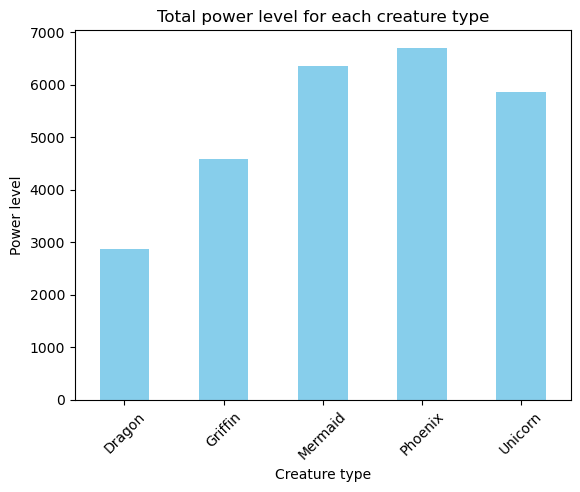

In [64]:
total_power = mystical_creatures.groupby('creature_type')['power_level'].sum()

total_power.plot(kind='bar', color='skyblue')
plt.title('Total power level for each creature type')
plt.xlabel('Creature type')
plt.ylabel('Power level')
plt.xticks(rotation=45)
plt.show()

### Question 10.2: Generate a pie chart representing the distribution of creatures by their habitat.

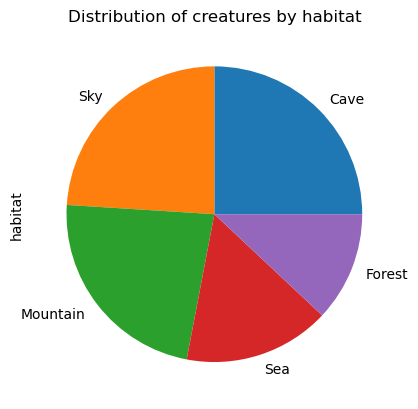

In [65]:
habitat_distribution = mystical_creatures['habitat'].value_counts()

habitat_distribution.plot(kind='pie')
plt.title('Distribution of creatures by habitat')
plt.show()

### Question 10.3: Plot a scatter plot to show the relationship between power level and age of the creatures.

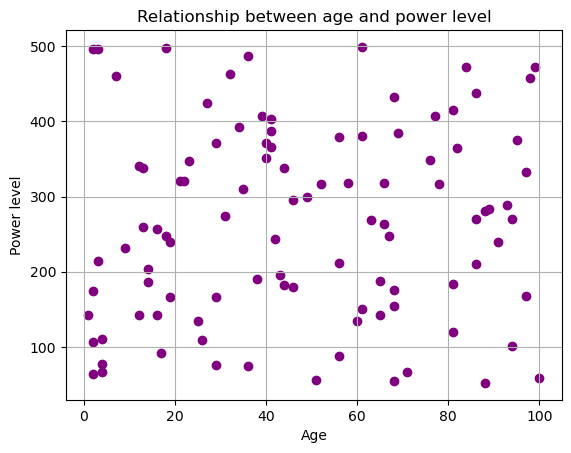

In [66]:
plt.scatter(mystical_creatures['age'], mystical_creatures['power_level'], color='purple')
plt.title('Relationship between age and power level')
plt.xlabel('Age')
plt.ylabel('Power level')
plt.grid(True)
plt.show()

### Question 10.4: Create a box plot to compare the power levels across different creature types.

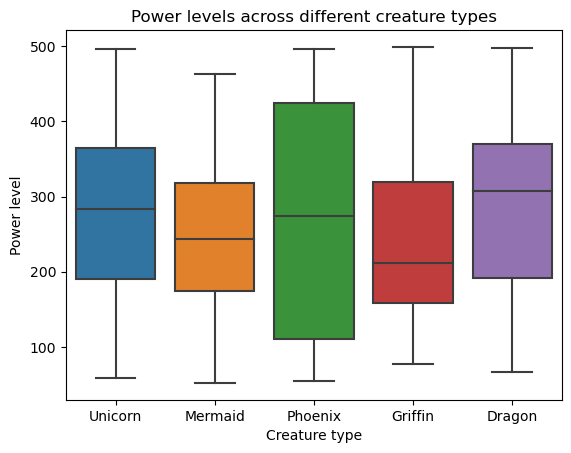

In [67]:
import seaborn as sns

sns.boxplot(x='creature_type', y='power_level', data=mystical_creatures)
plt.title('Power levels across different creature types')
plt.xlabel('Creature type')
plt.ylabel('Power level')
plt.show()

## Q11 - Nested Data Labyrinth <a class="anchor" id="chapter11"></a>

Question: Welcome to the Nested Data Labyrinth! You are given a dataset of enchanted forests and the magical creatures that inhabit them. Each forest contains multiple creatures, and each creature has various attributes. Your task is to navigate through this nested data to answer the following questions:

1. Count the total number of creatures in each forest.
2. Calculate the average power level of creatures in each forest.
3. Identify the forest with the highest average age of creatures.
4. Determine the most common creature type in each forest.
5. Find the top 2 creatures with the highest power levels in each forest.

Datasets:

enchanted_forests: Contains columns (forest_id, forest_name, creatures), where creatures is a list of dictionaries with keys (creature_id, creature_name, creature_type, age, power_level).

In [68]:
import json

# Seed for reproducibility
np.random.seed(707)

# Generate synthetic data
forest_ids = np.arange(1, 6)
forest_names = ['Mystic Grove', 'Enchanted Woods', 'Faerie Forest', 'Dragon’s Den', 'Unicorn Utopia']
creature_types = ['Dragon', 'Unicorn', 'Phoenix', 'Griffin', 'Mermaid']
creature_names = ['Draco', 'Sparkle', 'Flare', 'Griff', 'Ariel']

data = []
for forest_id, forest_name in zip(forest_ids, forest_names):
    num_creatures = np.random.randint(5, 11)
    creatures = []
    for _ in range(num_creatures):
        creature_id = np.random.randint(1, 1001)
        creature_type = np.random.choice(creature_types)
        creature_name = np.random.choice(creature_names)
        age = np.random.randint(1, 101)
        power_level = np.random.randint(50, 501)
        creatures.append({
            'creature_id': creature_id,
            'creature_name': creature_name,
            'creature_type': creature_type,
            'age': age,
            'power_level': power_level
        })
    data.append([forest_id, forest_name, json.dumps(creatures)])

# Create DataFrame
enchanted_forests = pd.DataFrame(data, columns=['forest_id', 'forest_name', 'creatures'])

# Display the dataset
print("Enchanted Forests DataFrame:")
print(enchanted_forests.head())

Enchanted Forests DataFrame:
   forest_id      forest_name  \
0          1     Mystic Grove   
1          2  Enchanted Woods   
2          3    Faerie Forest   
3          4     Dragon’s Den   
4          5   Unicorn Utopia   

                                           creatures  
0  [{"creature_id": 250, "creature_name": "Sparkl...  
1  [{"creature_id": 866, "creature_name": "Draco"...  
2  [{"creature_id": 714, "creature_name": "Draco"...  
3  [{"creature_id": 245, "creature_name": "Ariel"...  
4  [{"creature_id": 173, "creature_name": "Ariel"...  


### Question 11.1: Count the total number of creatures in each forest.

In [69]:
enchanted_forests['creature_count'] = enchanted_forests['creatures'].apply(lambda x: len(json.loads(x)))

enchanted_forests[['forest_name', 'creature_count']]

,forest_name,creature_count
0,Mystic Grove,8
1,Enchanted Woods,7
2,Faerie Forest,7
3,Dragon’s Den,5
4,Unicorn Utopia,10


### Question 11.2: Calculate the average power level of creatures in each forest.

In [70]:
def calculate_avg_power(creatures):
    creature_list = json.loads(creatures)
    total_power = sum(creature['power_level'] for creature in creature_list)
    return total_power / len(creature_list) if creature_list else 0

enchanted_forests['average_power_level'] = enchanted_forests['creatures'].apply(calculate_avg_power)

enchanted_forests[['forest_name', 'average_power_level']]

,forest_name,average_power_level
0,Mystic Grove,274.250000
1,Enchanted Woods,238.285714
2,Faerie Forest,293.571429
3,Dragon’s Den,226.600000
4,Unicorn Utopia,225.900000


### Question 11.3: Identify the forest with the highest average age of creatures.

In [71]:
def calculate_avg_age(creatures):
    creature_list = json.loads(creatures)
    total_age = sum(creature['age'] for creature in creature_list)
    return total_age / len(creature_list) if creature_list else 0

enchanted_forests['average_age'] = enchanted_forests['creatures'].apply(calculate_avg_age)

forest_highest_avg = enchanted_forests.loc[enchanted_forests['average_age'].idxmax()]

forest_highest_avg[['forest_name', 'average_age']]

forest_name    Unicorn Utopia
average_age              65.0
Name: 4, dtype: object

### Question 11.4: Determine the most common creature type in each forest.

In [72]:
def most_common_creature_type(creatures):
    creature_list = json.loads(creatures)
    creature_types = [creature['creature_type'] for creature in creature_list]
    return pd.Series(creature_types).mode()[0]

enchanted_forests['most_common_creature_type'] = enchanted_forests['creatures'].apply(most_common_creature_type)

enchanted_forests[['forest_name', 'most_common_creature_type']]

,forest_name,most_common_creature_type
0,Mystic Grove,Mermaid
1,Enchanted Woods,Griffin
2,Faerie Forest,Mermaid
3,Dragon’s Den,Mermaid
4,Unicorn Utopia,Griffin


### Question 11.5: Find the top 2 creatures with the highest power levels in each forest.

In [73]:
def top_2_creatures_by_power(creatures):
    creature_list = json.loads(creatures)
    sorted_creatures = sorted(creature_list, key=lambda x: x['power_level'], reverse=True)
    return sorted_creatures[:2]

enchanted_forests['top_2_creatures'] = enchanted_forests['creatures'].apply(top_2_creatures_by_power)

top_2_creatures = enchanted_forests[['forest_name', 'top_2_creatures']]

# manipulate for more readable output
top_2_creatures_formatted = top_2_creatures.explode('top_2_creatures').reset_index(drop=True)
top_2_creatures_formatted[['forest_name', 'creature_name', 'creature_type', 'power_level']] = top_2_creatures_formatted.apply(
    lambda row: (row['forest_name'], row['top_2_creatures']['creature_name'], row['top_2_creatures']['creature_type'], row['top_2_creatures']['power_level']),
    axis=1, result_type='expand'
)

top_2_creatures_formatted[['forest_name', 'creature_name', 'creature_type', 'power_level']]

,forest_name,creature_name,creature_type,power_level
0,Mystic Grove,Griff,Mermaid,450
1,Mystic Grove,Sparkle,Mermaid,413
2,Enchanted Woods,Sparkle,Griffin,470
3,Enchanted Woods,Griff,Unicorn,404
4,Faerie Forest,Ariel,Dragon,478
5,Faerie Forest,Draco,Mermaid,383
6,Dragon’s Den,Sparkle,Mermaid,383
7,Dragon’s Den,Flare,Mermaid,382
8,Unicorn Utopia,Ariel,Griffin,430
9,Unicorn Utopia,Sparkle,Griffin,410


## Q12 - Async Adventures in Data <a class="anchor" id="chapter12"></a>

Question: Welcome to Async Adventures in Data! You are given a dataset of magical quests undertaken by various whimsical characters. Each character can perform multiple quests, and each quest has different stages. Your task is to perform asynchronous data manipulation to answer the following questions:

1. Count the total number of quests each character has completed.
2. Calculate the average number of stages per quest for each character.
3. Identify the character with the highest average quest duration.
4. Determine the most common quest type for each character.
5. Find the character with the most diverse quest portfolio (i.e., highest number of unique quest types).

Datasets:

magical_quests: Contains columns (character_id, character_name, quests), where quests is a list of dictionaries with keys (quest_id, quest_type, stages, duration).

In [74]:
# Seed for reproducibility
np.random.seed(808)

# Generate synthetic data
character_ids = np.arange(1, 11)
character_names = ['Frodo', 'Gandalf', 'Hermione', 'Legolas', 'Bilbo', 'Galadriel', 'Dumbledore', 'Gimli', 'Harry', 'Aragorn']
quest_types = ['Treasure Hunt', 'Dragon Slaying', 'Potion Making', 'Spell Casting', 'Rescue Mission']
stage_options = np.arange(1, 6)
duration_options = np.arange(1, 101)

data = []
for character_id, character_name in zip(character_ids, character_names):
    num_quests = np.random.randint(5, 11)
    quests = []
    for _ in range(num_quests):
        quest_id = int(np.random.randint(1, 1001))
        quest_type = np.random.choice(quest_types)
        stages = int(np.random.choice(stage_options))
        duration = int(np.random.choice(duration_options))
        quests.append({
            'quest_id': quest_id,
            'quest_type': quest_type,
            'stages': stages,
            'duration': duration
        })
    data.append([character_id, character_name, json.dumps(quests)])

# Create DataFrame
magical_quests = pd.DataFrame(data, columns=['character_id', 'character_name', 'quests'])

# Display the dataset
print("Magical Quests DataFrame:")
print(magical_quests.head())

Magical Quests DataFrame:
   character_id character_name  \
0             1          Frodo   
1             2        Gandalf   
2             3       Hermione   
3             4        Legolas   
4             5          Bilbo   

                                              quests  
0  [{"quest_id": 295, "quest_type": "Dragon Slayi...  
1  [{"quest_id": 947, "quest_type": "Potion Makin...  
2  [{"quest_id": 951, "quest_type": "Spell Castin...  
3  [{"quest_id": 531, "quest_type": "Treasure Hun...  
4  [{"quest_id": 566, "quest_type": "Potion Makin...  


### Question 12.1: Count the total number of quests each character has completed.

In [75]:
magical_quests['quest_count'] = magical_quests['quests'].apply(lambda x: len(json.loads(x)))

magical_quests[['character_name', 'quest_count']]

,character_name,quest_count
0,Frodo,10
1,Gandalf,7
2,Hermione,8
3,Legolas,7
4,Bilbo,9
5,Galadriel,5
6,Dumbledore,7
7,Gimli,8
8,Harry,5
9,Aragorn,8


### Question 12.2: Calculate the average number of stages per quest for each character.

In [76]:
def calculate_avg_stages(quests):
    quest_list = json.loads(quests)
    total_stages = sum(quest['stages'] for quest in quest_list)
    return total_stages / len(quest_list) if quest_list else 0

magical_quests['average_stages'] = magical_quests['quests'].apply(calculate_avg_stages)

magical_quests[['character_name', 'average_stages']]

,character_name,average_stages
0,Frodo,3.500000
1,Gandalf,2.714286
2,Hermione,3.625000
3,Legolas,3.000000
4,Bilbo,3.000000
5,Galadriel,2.000000
6,Dumbledore,3.285714
7,Gimli,2.875000
8,Harry,3.000000
9,Aragorn,3.500000


### Question 12.3: Identify the character with the highest average quest duration.

In [77]:
def calculate_avg_duration(quests):
    quest_list = json.loads(quests)
    total_duration = sum(quest['duration'] for quest in quest_list)
    return total_duration / len(quest_list) if quest_list else 0

magical_quests['average_duration'] = magical_quests['quests'].apply(calculate_avg_duration)

char_highest_avg = magical_quests.loc[magical_quests['average_duration'].idxmax()]

char_highest_avg[['character_name', 'average_duration']]

character_name      Harry
average_duration     69.8
Name: 8, dtype: object

### Question 12.4: Determine the most common quest type for each character.

In [78]:
def most_common_quest_type(quests):
    quest_list = json.loads(quests)
    quest_types = [quest['quest_type'] for quest in quest_list]
    return pd.Series(quest_types).mode()[0]

magical_quests['most_common_quest_type'] = magical_quests['quests'].apply(most_common_quest_type)

magical_quests[['character_name', 'most_common_quest_type']]

,character_name,most_common_quest_type
0,Frodo,Rescue Mission
1,Gandalf,Potion Making
2,Hermione,Dragon Slaying
3,Legolas,Spell Casting
4,Bilbo,Rescue Mission
5,Galadriel,Treasure Hunt
6,Dumbledore,Treasure Hunt
7,Gimli,Potion Making
8,Harry,Dragon Slaying
9,Aragorn,Spell Casting


In [79]:
def unique_quest_types(quests):
    quest_list = json.loads(quests)
    quest_types = {quest['quest_type'] for quest in quest_list}
    return len(quest_types)

magical_quests['unique_quest_count'] = magical_quests['quests'].apply(unique_quest_types)

best_portfolio = magical_quests.loc[magical_quests['unique_quest_count'].idxmax()]

best_portfolio[['character_name', 'unique_quest_count']]

character_name        Frodo
unique_quest_count        5
Name: 0, dtype: object

## Q13 - Geo Pandas Adventure <a class="anchor" id="chapter13"></a>

Question: Welcome to Geo Pandas Adventure! You are given a dataset of magical locations and the whimsical creatures that inhabit them. Each location has different environmental properties and magical attributes. Your task is to analyze this geographical data to answer the following questions:

1. Count the total number of unique creatures in each location.
2. Calculate the average magical energy level for each location.
3. Identify the location with the highest diversity of creature types.
4. Determine the most common magical attribute in each location.
5. Find the top 3 locations with the highest average environmental scores.

Datasets:

magical_locations: Contains columns (location_id, location_name, creatures, magical_attributes, environmental_score), where creatures is a list of dictionaries with keys (creature_id, creature_name, creature_type, magical_energy).

In [80]:
# Seed for reproducibility
np.random.seed(909)

# Generate synthetic data
location_ids = np.arange(1, 6)
location_names = ['Mystic Mountain', 'Enchanted Forest', 'Faerie Glen', 'Dragon’s Lair', 'Unicorn Meadow']
creature_types = ['Dragon', 'Unicorn', 'Phoenix', 'Griffin', 'Mermaid']
creature_names = ['Draco', 'Sparkle', 'Flare', 'Griff', 'Ariel']
magical_attributes_options = ['Glowing Stones', 'Whispering Winds', 'Mystic Waters', 'Enchanted Trees', 'Floating Islands']
environmental_scores = np.random.randint(50, 101, size=len(location_ids))

data = []
for location_id, location_name in zip(location_ids, location_names):
    num_creatures = np.random.randint(5, 11)
    creatures = []
    for _ in range(num_creatures):
        creature_id = int(np.random.randint(1, 1001))
        creature_type = np.random.choice(creature_types)
        creature_name = np.random.choice(creature_names)
        magical_energy = int(np.random.randint(50, 501))
        creatures.append({
            'creature_id': creature_id,
            'creature_name': creature_name,
            'creature_type': creature_type,
            'magical_energy': magical_energy
        })
    magical_attributes = np.random.choice(magical_attributes_options, np.random.randint(1, 4), replace=False).tolist()
    data.append([location_id, location_name, json.dumps(creatures), magical_attributes, environmental_scores[location_id-1]])

# Create DataFrame
magical_locations = pd.DataFrame(data, columns=['location_id', 'location_name', 'creatures', 'magical_attributes', 'environmental_score'])

# Display the dataset
print("Magical Locations DataFrame:")
print(magical_locations.head())

Magical Locations DataFrame:
   location_id     location_name  \
0            1   Mystic Mountain   
1            2  Enchanted Forest   
2            3       Faerie Glen   
3            4     Dragon’s Lair   
4            5    Unicorn Meadow   

                                           creatures  \
0  [{"creature_id": 16, "creature_name": "Griff",...   
1  [{"creature_id": 764, "creature_name": "Griff"...   
2  [{"creature_id": 172, "creature_name": "Ariel"...   
3  [{"creature_id": 514, "creature_name": "Ariel"...   
4  [{"creature_id": 658, "creature_name": "Griff"...   

                                  magical_attributes  environmental_score  
0                                  [Enchanted Trees]                   78  
1                 [Floating Islands, Glowing Stones]                   96  
2                                    [Mystic Waters]                   82  
3  [Whispering Winds, Enchanted Trees, Mystic Wat...                   61  
4                                  [E

### Question 13.1: Count the total number of unique creatures in each location.

In [81]:
magical_locations['unique_creature_count'] = magical_locations['creatures'].apply(
    lambda x: len(set([creature['creature_id'] for creature in json.loads(x)]))
)
magical_locations[['location_name', 'unique_creature_count']]

,location_name,unique_creature_count
0,Mystic Mountain,5
1,Enchanted Forest,8
2,Faerie Glen,8
3,Dragon’s Lair,6
4,Unicorn Meadow,10


### Question 13.2: Calculate the average magical energy level for each location.

In [82]:
magical_locations['avg_magical_energy_each_loc'] = magical_locations['creatures'].apply(
    lambda x: np.mean([creature['magical_energy'] for creature in json.loads(x)])
)
magical_locations[['location_name', 'avg_magical_energy_each_loc']]

,location_name,avg_magical_energy_each_loc
0,Mystic Mountain,284.0
1,Enchanted Forest,239.5
2,Faerie Glen,271.0
3,Dragon’s Lair,135.5
4,Unicorn Meadow,235.3


### Question 13.3: Identify the location with the highest diversity of creature types.

In [83]:
magical_locations['creature_type_diversity'] = magical_locations['creatures'].apply(
    lambda x: len(set([creature['creature_type'] for creature in json.loads(x)]))
)
highest_diversity = magical_locations.loc[magical_locations['creature_type_diversity'].idxmax()]

highest_diversity[['location_name', 'creature_type_diversity']]

location_name              Unicorn Meadow
creature_type_diversity                 5
Name: 4, dtype: object

### Question 13.4: Determine the most common magical attribute in each location.

In [84]:
def most_common_attribute(attributes):
    if attributes:
        return Counter(attributes).most_common(1)[0][0]
    return none

magical_locations['most_common_magical_attribute'] = magical_locations['magical_attributes'].apply(
    lambda x: most_common_attribute(x)
)

magical_locations[['location_name', 'most_common_magical_attribute']]

,location_name,most_common_magical_attribute
0,Mystic Mountain,Enchanted Trees
1,Enchanted Forest,Floating Islands
2,Faerie Glen,Mystic Waters
3,Dragon’s Lair,Whispering Winds
4,Unicorn Meadow,Enchanted Trees


### Question 13.5: Find the top 3 locations with the highest average environmental scores.

In [85]:
magical_locations.nlargest(3, 'environmental_score')[['location_name', 'environmental_score']]

,location_name,environmental_score
1,Enchanted Forest,96
4,Unicorn Meadow,86
2,Faerie Glen,82


## Q14 - Network Nexus Analysis <a class="anchor" id="chapter14"></a>

Question: Welcome to the Network Nexus Analysis! You are given a dataset of magical creatures and their social networks. Each creature has connections to other creatures, and each connection has a strength value indicating the closeness of their relationship. Your task is to analyze these social networks to answer the following questions:

1. Count the total number of connections each creature has.
2. Calculate the average connection strength for each creature.
3. Identify the creature with the highest average connection strength.
4. Determine the most connected creature (i.e., the creature with the most connections).
5. Find the top 3 creatures with the strongest total connection strength.

Datasets:

social_networks: Contains columns (creature_id, creature_name, connections), where connections is a list of dictionaries with keys (connected_creature_id, connection_strength).

In [86]:
# Seed for reproducibility
np.random.seed(1010)

# Generate synthetic data
creature_ids = np.arange(1, 11)
creature_names = ['Frodo', 'Gandalf', 'Hermione', 'Legolas', 'Bilbo', 'Galadriel', 'Dumbledore', 'Gimli', 'Harry', 'Aragorn']
connection_strengths = np.arange(1, 11)

data = []
for creature_id, creature_name in zip(creature_ids, creature_names):
    num_connections = np.random.randint(3, 7)
    connections = []
    connected_creatures = np.random.choice(creature_ids[creature_ids != creature_id], num_connections, replace=False)
    for connected_creature_id in connected_creatures:
        connection_strength = np.random.choice(connection_strengths)
        connections.append({
            'connected_creature_id': int(connected_creature_id),
            'connection_strength': int(connection_strength)
        })
    data.append([creature_id, creature_name, json.dumps(connections)])

# Create DataFrame
social_networks = pd.DataFrame(data, columns=['creature_id', 'creature_name', 'connections'])

# Display the dataset
print("Social Networks DataFrame:")
print(social_networks.head())

Social Networks DataFrame:
   creature_id creature_name  \
0            1         Frodo   
1            2       Gandalf   
2            3      Hermione   
3            4       Legolas   
4            5         Bilbo   

                                         connections  
0  [{"connected_creature_id": 3, "connection_stre...  
1  [{"connected_creature_id": 6, "connection_stre...  
2  [{"connected_creature_id": 7, "connection_stre...  
3  [{"connected_creature_id": 1, "connection_stre...  
4  [{"connected_creature_id": 3, "connection_stre...  


### Question 14.1: Count the total number of connections each creature has.

In [87]:
social_networks['total_connections'] = social_networks['connections'].apply(lambda x: len(json.loads(x)))

social_networks[['creature_name', 'total_connections']]

,creature_name,total_connections
0,Frodo,3
1,Gandalf,3
2,Hermione,5
3,Legolas,4
4,Bilbo,6
5,Galadriel,4
6,Dumbledore,6
7,Gimli,4
8,Harry,4
9,Aragorn,4


### Question 14.2: Calculate the average connection strength for each creature.

In [88]:
social_networks['avg_connection_strength'] = social_networks['connections'].apply(
    lambda x: np.mean([connection['connection_strength'] for connection in json.loads(x)])
)
social_networks[['creature_name', 'avg_connection_strength']]

,creature_name,avg_connection_strength
0,Frodo,3.666667
1,Gandalf,3.000000
2,Hermione,5.800000
3,Legolas,3.500000
4,Bilbo,5.000000
5,Galadriel,5.250000
6,Dumbledore,6.166667
7,Gimli,5.250000
8,Harry,4.750000
9,Aragorn,7.250000


### Question 14.3: Identify the creature with the highest average connection strength.

In [89]:
highest_avg_strength = social_networks.loc[
    social_networks['avg_connection_strength'].idxmax()
]
highest_avg_strength[['creature_name', 'avg_connection_strength']]

creature_name              Aragorn
avg_connection_strength       7.25
Name: 9, dtype: object

### Question 14.4: Determine the most connected creature (i.e., the creature with the most connections).

In [90]:
# use total_connections from 14.1
most_connected_creature = social_networks.loc[
    social_networks['total_connections'].idxmax()
]
most_connected_creature[['creature_name', 'total_connections']]

creature_name        Bilbo
total_connections        6
Name: 4, dtype: object

### Question 14.5: Find the top 3 creatures with the strongest total connection strength.

In [91]:
social_networks['total_connection_strength'] = social_networks['connections'].apply(
    lambda x: sum([connection['connection_strength'] for connection in json.loads(x)])
)
social_networks.nlargest(3, 'total_connection_strength')[['creature_name', 'total_connection_strength']]

,creature_name,total_connection_strength
6,Dumbledore,37
4,Bilbo,30
2,Hermione,29


## Q15 - High Dimensional Hide and Seek <a class="anchor" id="chapter15"></a>

Question: Welcome to High Dimensional Hide and Seek! You are given a dataset of magical artifacts and their multidimensional properties. Each artifact has several attributes across different dimensions. Your task is to analyze these high-dimensional data to answer the following questions:

1. Count the total number of artifacts in each category.
2. Calculate the average value of each attribute for each category.
3. Identify the category with the highest average "magic intensity" attribute.
4. Determine the artifact with the highest combined value of all attributes.
5. Find the top 3 categories with the highest variance in "enchantment" attribute.

Datasets:

magical_artifacts: Contains columns (artifact_id, category, attributes), where attributes is a dictionary with keys (magic_intensity, power_level, durability, enchantment, rarity).

In [92]:
# Seed for reproducibility
np.random.seed(1111)

# Generate synthetic data
artifact_ids = np.arange(1, 21)
categories = ['Wands', 'Potions', 'Amulets', 'Scrolls', 'Rings']
attributes_keys = ['magic_intensity', 'power_level', 'durability', 'enchantment', 'rarity']

data = []
for artifact_id in artifact_ids:
    category = np.random.choice(categories)
    attributes = {
        'magic_intensity': np.random.randint(1, 101),
        'power_level': np.random.randint(1, 101),
        'durability': np.random.randint(1, 101),
        'enchantment': np.random.randint(1, 101),
        'rarity': np.random.randint(1, 101)
    }
    data.append([artifact_id, category, json.dumps(attributes)])

# Create DataFrame
magical_artifacts = pd.DataFrame(data, columns=['artifact_id', 'category', 'attributes'])

# Display the dataset
print("Magical Artifacts DataFrame:")
print(magical_artifacts.head())

Magical Artifacts DataFrame:
   artifact_id category                                         attributes
0            1    Rings  {"magic_intensity": 56, "power_level": 82, "du...
1            2    Wands  {"magic_intensity": 23, "power_level": 21, "du...
2            3    Rings  {"magic_intensity": 87, "power_level": 9, "dur...
3            4  Amulets  {"magic_intensity": 77, "power_level": 95, "du...
4            5    Wands  {"magic_intensity": 10, "power_level": 10, "du...


### Question 15.1: Count the total number of artifacts in each category.

In [93]:
magical_artifacts.groupby('category').size()

category
Amulets    3
Potions    4
Rings      5
Scrolls    5
Wands      3
dtype: int64

### Question 15.2: Calculate the average value of each attribute for each category.

In [94]:
attributes_expanded = magical_artifacts['attributes'].apply(json.loads).apply(pd.Series)

magical_artifacts_expanded = pd.concat([magical_artifacts.drop('attributes', axis=1), attributes_expanded], axis=1)

magical_artifacts_expanded.groupby('category').mean()

,artifact_id,magic_intensity,power_level,durability,enchantment,rarity
category,,,,,,
Amulets,8.000000,66.000000,72.0,33.000000,48.333333,46.333333
Potions,12.750000,63.000000,51.0,62.000000,33.000000,34.750000
Rings,7.600000,50.400000,63.0,23.600000,58.400000,59.200000
Scrolls,14.800000,34.400000,36.4,74.200000,51.200000,57.800000
Wands,7.666667,33.666667,32.0,34.333333,30.666667,33.333333


### Question 15.3: Identify the category with the highest average "magic intensity" attribute.

In [95]:
avg_category_attribute = magical_artifacts_expanded.groupby('category').mean()

highest_mi_category = avg_category_attribute['magic_intensity'].idxmax()
highest_mi_value = avg_category_attribute['magic_intensity'].max()

print(f"{highest_mi_category} : {highest_mi_value}")

Amulets : 66.0


### Question 15.4: Determine the artifact with the highest combined value of all attributes.

In [96]:
magical_artifacts_expanded['total_attributes_value'] = magical_artifacts_expanded[
    ['magic_intensity', 'power_level', 'durability', 'enchantment', 'rarity']].sum(axis=1)

magical_artifacts_expanded.loc[magical_artifacts_expanded['total_attributes_value'].idxmax()]

artifact_id                   8
category                  Rings
magic_intensity              99
power_level                  89
durability                    1
enchantment                  88
rarity                       94
total_attributes_value      371
Name: 7, dtype: object

### Question 15.5: Find the top 3 categories with the highest variance in "enchantment" attribute.

In [97]:
enchantment_variance_by_category = magical_artifacts_expanded.groupby('category')['enchantment'].var()

enchantment_variance_by_category.sort_values(ascending=False).head(3)

category
Scrolls    1989.2
Potions    1082.0
Rings       777.3
Name: enchantment, dtype: float64

## Q16 - Real-time Data Rush <a class="anchor" id="chapter16"></a>

Question: Welcome to Real-time Data Rush! You are given a dataset of magical creatures and their real-time activities. Each creature performs various activities with different durations throughout the day. Your task is to analyze this time-based data to answer the following questions:

1. Calculate the total duration of activities for each creature.
2. Determine the creature with the longest single activity duration.
3. Identify the most common activity performed by each creature.
4. Calculate the average activity duration for each type of activity across all creatures.
5. Find the top 3 creatures with the highest average activity duration.

Datasets:

creature_activities: Contains columns (creature_id, creature_name, activity, duration), where activity is the type of activity and duration is the time spent on that activity in minutes.

In [98]:
# Seed for reproducibility
np.random.seed(1212)

# Generate synthetic data
creature_ids = np.arange(1, 11)
creature_names = ['Frodo', 'Gandalf', 'Hermione', 'Legolas', 'Bilbo', 'Galadriel', 'Dumbledore', 'Gimli', 'Harry', 'Aragorn']
activities = ['Flying', 'Potion Making', 'Spell Casting', 'Herb Gathering', 'Treasure Hunting']
durations = np.arange(1, 121)  # Durations from 1 to 120 minutes

data = []
for creature_id, creature_name in zip(creature_ids, creature_names):
    num_activities = np.random.randint(5, 15)
    for _ in range(num_activities):
        activity = np.random.choice(activities)
        duration = np.random.choice(durations)
        data.append([creature_id, creature_name, activity, duration])

# Create DataFrame
creature_activities = pd.DataFrame(data, columns=['creature_id', 'creature_name', 'activity', 'duration'])

# Display the dataset
print("Creature Activities DataFrame:")
print(creature_activities.head())

Creature Activities DataFrame:
   creature_id creature_name          activity  duration
0            1         Frodo     Spell Casting        55
1            1         Frodo     Spell Casting        81
2            1         Frodo     Potion Making        34
3            1         Frodo    Herb Gathering        83
4            1         Frodo  Treasure Hunting        40


### Question 16.1: Calculate the total duration of activities for each creature.

In [99]:
creature_activities.groupby('creature_name')['duration'].sum()

creature_name
Aragorn       324
Bilbo         387
Dumbledore    330
Frodo         758
Galadriel     535
Gandalf       188
Gimli         533
Harry         370
Hermione      611
Legolas       344
Name: duration, dtype: int32

### Question 16.2: Determine the creature with the longest single activity duration.

In [100]:
creature_activities.loc[creature_activities['duration'].idxmax()]

creature_id                  7
creature_name       Dumbledore
activity         Potion Making
duration                   116
Name: 50, dtype: object

### Question 16.3: Identify the most common activity performed by each creature.

In [101]:
activity_counts = creature_activities.groupby(['creature_name', 'activity']).size().reset_index(name='count')

activity_counts.loc[activity_counts.groupby('creature_name')['count'].idxmax()]

,creature_name,activity,count
3,Aragorn,Treasure Hunting,3
5,Bilbo,Potion Making,3
8,Dumbledore,Flying,2
14,Frodo,Spell Casting,4
16,Galadriel,Flying,2
21,Gandalf,Flying,4
24,Gimli,Herb Gathering,3
32,Harry,Treasure Hunting,3
33,Hermione,Flying,3
40,Legolas,Treasure Hunting,3


### Question 16.4: Calculate the average activity duration for each type of activity across all creatures.

In [102]:
creature_activities.groupby('activity')['duration'].mean().reset_index(name='avg_duration')

,activity,avg_duration
0,Flying,47.388889
1,Herb Gathering,48.000000
2,Potion Making,61.294118
3,Spell Casting,68.454545
4,Treasure Hunting,55.789474


### Question 16.5: Find the top 3 creatures with the highest average activity duration.

In [103]:
avg_duration_per_creature = creature_activities.groupby('creature_name')['duration'].mean()

avg_duration_per_creature.sort_values(ascending=False).head(3)

creature_name
Hermione      67.888889
Galadriel     66.875000
Dumbledore    66.000000
Name: duration, dtype: float64

## Q17 - Machine Learning Preprocess Pandemonium <a class="anchor" id="chapter17"></a>

Question: Welcome to Machine Learning Preprocess Pandemonium! You are given a dataset of magical creatures and their attributes. Your task is to perform various preprocessing steps commonly used in machine learning to answer the following questions:

1. Normalize the attributes of the creatures.
2. Encode the categorical features of the dataset.
3. Identify and handle any missing values.
4. Perform feature selection to identify the most important attributes.
5. Split the dataset into training and testing sets.

Datasets:

creature_attributes: Contains columns (creature_id, creature_name, creature_type, magic_power, agility, intelligence, strength, loyalty).

In [104]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# Seed for reproducibility
np.random.seed(1313)

# Generate synthetic data
creature_ids = np.arange(1, 21)
creature_names = ['Frodo', 'Gandalf', 'Hermione', 'Legolas', 'Bilbo', 'Galadriel', 'Dumbledore', 'Gimli', 'Harry', 'Aragorn']
creature_types = ['Wizard', 'Elf', 'Hobbit', 'Human', 'Dwarf']
attributes = {
    'magic_power': np.random.randint(1, 101, size=20),
    'agility': np.random.randint(1, 101, size=20),
    'intelligence': np.random.randint(1, 101, size=20),
    'strength': np.random.randint(1, 101, size=20),
    'loyalty': np.random.randint(1, 101, size=20)
}

data = []
for creature_id in creature_ids:
    creature_name = np.random.choice(creature_names)
    creature_type = np.random.choice(creature_types)
    magic_power = attributes['magic_power'][creature_id - 1]
    agility = attributes['agility'][creature_id - 1]
    intelligence = attributes['intelligence'][creature_id - 1]
    strength = attributes['strength'][creature_id - 1]
    loyalty = attributes['loyalty'][creature_id - 1]
    data.append([creature_id, creature_name, creature_type, magic_power, agility, intelligence, strength, loyalty])

# Introduce some missing values
data[3][3] = np.nan
data[7][5] = np.nan

# Create DataFrame
creature_attributes = pd.DataFrame(data, columns=['creature_id', 'creature_name', 'creature_type', 'magic_power', 'agility', 'intelligence', 'strength', 'loyalty'])

# Display the dataset
print("Creature Attributes DataFrame:")
print(creature_attributes.head())

Creature Attributes DataFrame:
   creature_id creature_name creature_type  magic_power  agility  \
0            1    Dumbledore        Wizard         52.0       97   
1            2         Bilbo           Elf         97.0       64   
2            3       Legolas         Human         43.0        5   
3            4      Hermione         Dwarf          NaN       17   
4            5         Frodo        Hobbit         71.0       73   

   intelligence  strength  loyalty  
0          64.0        48       75  
1          70.0        60       76  
2          84.0         6       77  
3          61.0        54       48  
4          81.0        49       71  


### Question 17.1: Normalize the attributes of the creatures.

In [105]:
# this on the knowledge that there are no missing values in the dataframe
attributes_columns = ['magic_power', 'agility', 'intelligence', 'strength', 'loyalty']

# normalize attributes
scaler = StandardScaler()
normalized_attributes = scaler.fit_transform(creature_attributes[attributes_columns])

# turn back into dataframe
normalized_attributes_df = pd.DataFrame(normalized_attributes, columns=attributes_columns)

normalized_attributes_df

,magic_power,agility,intelligence,strength,loyalty
0,0.076227,1.546702,-0.027481,-0.052329,0.337526
1,1.557458,0.429827,0.213504,0.328245,0.375450
2,-0.220019,-1.567009,0.775803,-1.384336,0.413374
3,NaN,-1.160872,-0.147973,0.137958,-0.686429
4,0.701636,0.734430,0.655311,-0.020614,0.185829
5,0.899133,1.343634,1.016788,-0.306044,0.413374
6,1.327044,-1.228562,-0.388959,-1.447764,1.096011
7,-1.339171,-0.551668,NaN,-1.225763,-2.393020
8,-1.306255,1.039032,1.137281,-1.162334,0.337526
9,-1.108758,-0.043998,-0.308630,1.533393,1.096011


### Question 17.2: Encode the categorical features of the dataset.

In [106]:
categorical_columns = ['creature_name', 'creature_type']

encoder = OneHotEncoder(sparse_output=False, drop='first')

encoded_categorical_data = encoder.fit_transform(creature_attributes[categorical_columns])

encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_columns))

encoded_categorical_df.head()

,creature_name_Dumbledore,creature_name_Frodo,creature_name_Galadriel,creature_name_Gandalf,creature_name_Harry,creature_name_Hermione,creature_name_Legolas,creature_type_Elf,creature_type_Hobbit,creature_type_Human,creature_type_Wizard
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Question 17.3: Encode the categorical features of the dataset.

In [107]:
creature_attributes.isnull().sum()

creature_id      0
creature_name    0
creature_type    0
magic_power      1
agility          0
intelligence     1
strength         0
loyalty          0
dtype: int64

In [108]:
imputer = SimpleImputer(strategy='mean')

creature_attributes[['magic_power', 'intelligence']] = imputer.fit_transform(creature_attributes[['magic_power', 'intelligence']])

creature_attributes.isnull().sum()

creature_id      0
creature_name    0
creature_type    0
magic_power      0
agility          0
intelligence     0
strength         0
loyalty          0
dtype: int64

### Question 17.4: Perform feature selection to identify the most important attributes.

In [109]:
from sklearn.preprocessing import LabelEncoder

features = ['magic_power', 'agility', 'intelligence', 'strength', 'loyalty']

label_encoder = LabelEncoder()
encoded_target = label_encoder.fit_transform(creature_attributes['creature_type'])

k_best_selector = SelectKBest(score_func=f_classif, k='all')

k_best_selector.fit(creature_attributes[features], encoded_target)

feature_scores = k_best_selector.scores_

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Score': feature_scores
}).sort_values(by='Score', ascending=False)

feature_importance_df

,Feature,Score
3,strength,2.240180
2,intelligence,1.452092
0,magic_power,1.349636
1,agility,0.281336
4,loyalty,0.155036


### Question 17.5: Split the dataset into training and testing sets.

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    creature_attributes[features],
    encoded_target,
    test_size=0.2,
    random_state=175
)

## Q18 - Text Tango with Pandas <a class="anchor" id="chapter18"></a>

Question: Welcome to Text Tango with Pandas! You are given a dataset of magical creatures and their quirky catchphrases. Each creature has a unique set of catchphrases, and your task is to perform various text analysis operations to answer the following questions:

1. Count the total number of unique words used by each creature.
2. Identify the most common word across all catchphrases.
3. Determine the average length of catchphrases for each creature.
4. Find the creature with the longest single catchphrase.
5. Create a word cloud visualization for the catchphrases of the top 3 creatures with the most unique words.

Datasets:

creature_catchphrases: Contains columns (creature_id, creature_name, catchphrases), where catchphrases is a list of strings representing the catchphrases.

In [111]:
# from wordcloud import WordCloud # don't have this library installed

# Seed for reproducibility
np.random.seed(1414)

# Generate synthetic data
creature_ids = np.arange(1, 11)
creature_names = ['Frodo', 'Gandalf', 'Hermione', 'Legolas', 'Bilbo', 'Galadriel', 'Dumbledore', 'Gimli', 'Harry', 'Aragorn']
catchphrases_list = [
    ["A wizard is never late", "Fly you fools", "You shall not pass"],
    ["Expecto Patronum", "It's Leviosa, not Leviosar", "I solemnly swear that I am up to no good"],
    ["I am not a number, I am a free man", "To infinity and beyond", "May the force be with you"],
    ["Winter is coming", "You know nothing, Jon Snow", "Hold the door"],
    ["Inconceivable", "My name is Inigo Montoya", "You killed my father, prepare to die"],
    ["Hakuna Matata", "Just keep swimming", "To infinity and beyond"],
    ["Here's looking at you, kid", "I'll be back", "Hasta la vista, baby"],
    ["I see dead people", "You can't handle the truth", "I feel the need, the need for speed"],
    ["Houston, we have a problem", "You had me at hello", "Show me the money"],
    ["I'm king of the world", "Nobody puts Baby in a corner", "I am Groot"]
]

data = []
for creature_id, creature_name in zip(creature_ids, creature_names):
    catchphrases = np.random.choice(catchphrases_list[np.random.randint(0, len(catchphrases_list))], np.random.randint(3, 6)).tolist()
    data.append([creature_id, creature_name, catchphrases])

# Create DataFrame
creature_catchphrases = pd.DataFrame(data, columns=['creature_id', 'creature_name', 'catchphrases'])

# Display the dataset
print("Creature Catchphrases DataFrame:")
print(creature_catchphrases.head())

Creature Catchphrases DataFrame:
   creature_id creature_name  \
0            1         Frodo   
1            2       Gandalf   
2            3      Hermione   
3            4       Legolas   
4            5         Bilbo   

                                        catchphrases  
0  [To infinity and beyond, May the force be with...  
1  [Houston, we have a problem, Houston, we have ...  
2  [You can't handle the truth, I feel the need, ...  
3  [You know nothing, Jon Snow, You know nothing,...  
4  [Fly you fools, A wizard is never late, A wiza...  


### Question 18.1: Count the total number of unique words used by each creature.

In [112]:
def count_unique_words(catchphrases):
    words = ' '.join(catchphrases).lower().split()
    unique_words = set(words)
    return len(unique_words)

creature_catchphrases['unique_word_count'] = creature_catchphrases['catchphrases'].apply(count_unique_words)

creature_catchphrases[['creature_name', 'unique_word_count']]

,creature_name,unique_word_count
0,Frodo,10
1,Gandalf,10
2,Hermione,14
3,Legolas,5
4,Bilbo,8
5,Galadriel,14
6,Dumbledore,14
7,Gimli,9
8,Harry,9
9,Aragorn,11


### Question 18.2: Identify the most common word across all catchphrases.

In [113]:
def tokenize_catchphrase(catchphrase_list):
    words = []
    for catchphrase in catchphrase_list:
        words.extend(' '.join(catchphrase).lower().split())
    return words

all_words = tokenize_catchphrase(creature_catchphrases['catchphrases'])

word_counter = Counter(all_words)

mc_word, mc_count = word_counter.most_common(1)[0]

print(f"Most common word: {mc_word}, appearences: {mc_count}")

Most common word: the, appearences: 16


### Question 18.3: Determine the average length of catchphrases for each creature.

In [114]:
def avg_catchphrase_length(catchphrases):
    lengths = [len(catchphrase.split()) for catchphrase in catchphrases]
    return np.mean(lengths)

creature_catchphrases['avg_catchphrase_length'] = creature_catchphrases['catchphrases'].apply(avg_catchphrase_length)
print(f"{creature_catchphrases[['creature_name', 'avg_catchphrase_length']]}")

  creature_name  avg_catchphrase_length
0         Frodo                4.666667
1       Gandalf                5.000000
2      Hermione                5.500000
3       Legolas                5.000000
4         Bilbo                4.500000
5     Galadriel                5.200000
6    Dumbledore                6.250000
7         Gimli                3.000000
8         Harry                4.333333
9       Aragorn                8.000000


### Question 18.4: Find the creature with the longest single catchphrase.

In [115]:
def find_longest_catchphrase(catchphrases):
    longest_catchphrase = max(catchphrases, key=lambda cp: len(cp.split()))
    return longest_catchphrase, len(longest_catchphrase.split())

creature_catchphrases['longest_catchphrase'], creature_catchphrases['longest_catchphrase_length'] = zip(
    *creature_catchphrases['catchphrases'].apply(find_longest_catchphrase)
)

longest_single_catchphrase = creature_catchphrases.loc[creature_catchphrases['longest_catchphrase_length'].idxmax()]

print(f"Creature with longest catchphrase: {longest_single_catchphrase['creature_name']}")
print(f"Catchphrase : {longest_single_catchphrase['longest_catchphrase']}")
print(f"Catchphrase length: {longest_single_catchphrase['longest_catchphrase_length']}")

Creature with longest catchphrase: Aragorn
Catchphrase : I solemnly swear that I am up to no good
Catchphrase length: 10


## Q19 - Anomaly Detection Drama <a class="anchor" id="chapter19"></a>

Question: Welcome to Anomaly Detection Drama! You are given a dataset of enchanted items and their magical properties. Each item has various attributes, and your task is to detect anomalies in this dataset to answer the following questions:

1. Identify the items with the highest outlier scores based on their attributes.
2. Determine the average value of each attribute for the non-anomalous items.
3. Calculate the number of anomalies detected for each item category.
4. Find the item with the most extreme outlier score in each category.
5. Visualize the distribution of outlier scores across all items using a box plot.

Datasets:

enchanted_items: Contains columns (item_id, item_name, category, power_level, enchantment_level, durability, rarity, age).
Generate synthetic data for the dataset and perform the required analysis to find the answers.

In [116]:
from sklearn.ensemble import IsolationForest

# Seed for reproducibility
np.random.seed(1515)

# Generate synthetic data
item_ids = np.arange(1, 51)
item_names = [f'Item_{i}' for i in item_ids]
categories = ['Wand', 'Potion', 'Amulet', 'Scroll', 'Ring']
attributes = {
    'power_level': np.random.randint(1, 101, size=50),
    'enchantment_level': np.random.randint(1, 101, size=50),
    'durability': np.random.randint(1, 101, size=50),
    'rarity': np.random.randint(1, 101, size=50),
    'age': np.random.randint(1, 101, size=50)
}

data = []
for item_id, item_name in zip(item_ids, item_names):
    category = np.random.choice(categories)
    power_level = attributes['power_level'][item_id - 1]
    enchantment_level = attributes['enchantment_level'][item_id - 1]
    durability = attributes['durability'][item_id - 1]
    rarity = attributes['rarity'][item_id - 1]
    age = attributes['age'][item_id - 1]
    data.append([item_id, item_name, category, power_level, enchantment_level, durability, rarity, age])

# Create DataFrame
enchanted_items = pd.DataFrame(data, columns=['item_id', 'item_name', 'category', 'power_level', 'enchantment_level', 'durability', 'rarity', 'age'])

# Display the dataset
print("Enchanted Items DataFrame:")
print(enchanted_items.head())

Enchanted Items DataFrame:
   item_id item_name category  power_level  enchantment_level  durability  \
0        1    Item_1   Scroll           72                 29          90   
1        2    Item_2   Amulet           41                 56           5   
2        3    Item_3   Potion           71                 58          51   
3        4    Item_4   Amulet           15                 27          55   
4        5    Item_5   Amulet           96                 54          23   

   rarity  age  
0      45   91  
1       6   67  
2      12   29  
3       7   24  
4      50   54  


### Question 19.1: Identify the items with the highest outlier scores based on their attributes.

In [117]:
attribute_columns = ['power_level', 'enchantment_level', 'durability', 'rarity', 'age']

isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=69)

isolation_forest.fit(enchanted_items[attribute_columns])

outlier_scores = isolation_forest.decision_function(enchanted_items[attribute_columns])

enchanted_items['outlier_score'] = -outlier_scores

enchanted_items.sort_values(by='outlier_score', ascending=False).head(5)

,item_id,item_name,category,power_level,enchantment_level,durability,rarity,age,outlier_score
45,46,Item_46,Ring,99,88,13,29,100,0.076180
10,11,Item_11,Potion,3,11,8,24,74,0.070050
28,29,Item_29,Ring,11,75,9,81,95,0.069143
33,34,Item_34,Amulet,97,100,78,35,61,0.060923
41,42,Item_42,Ring,86,26,61,1,2,0.054635


### Question 19.2: Determine the average value of each attribute for the non-anomalous items.

In [118]:
non_anomalous_items = enchanted_items[enchanted_items['outlier_score'] <= 0]

non_anomalous_items[['power_level', 'enchantment_level', 'durability', 'rarity', 'age']].mean()

power_level          54.750000
enchantment_level    48.214286
durability           56.714286
rarity               44.785714
age                  44.464286
dtype: float64

### Question 19.3: Calculate the number of anomalies detected for each item category.

In [119]:
anomalous_items = enchanted_items[enchanted_items['outlier_score'] > 0]

anomalous_items.groupby('category').size()

category
Amulet    6
Potion    5
Ring      4
Scroll    3
Wand      4
dtype: int64

### Question 19.4: Find the item with the most extreme outlier score in each category.

In [120]:
enchanted_items.loc[enchanted_items.groupby('category')['outlier_score'].idxmax()]

,item_id,item_name,category,power_level,enchantment_level,durability,rarity,age,outlier_score
33,34,Item_34,Amulet,97,100,78,35,61,0.060923
10,11,Item_11,Potion,3,11,8,24,74,0.070050
45,46,Item_46,Ring,99,88,13,29,100,0.076180
21,22,Item_22,Scroll,27,5,83,58,43,0.022396
27,28,Item_28,Wand,69,6,19,37,1,0.043958


### Question 19.5: Visualize the distribution of outlier scores across all items using a box plot.

Text(0.5, 0, 'Outlier score')

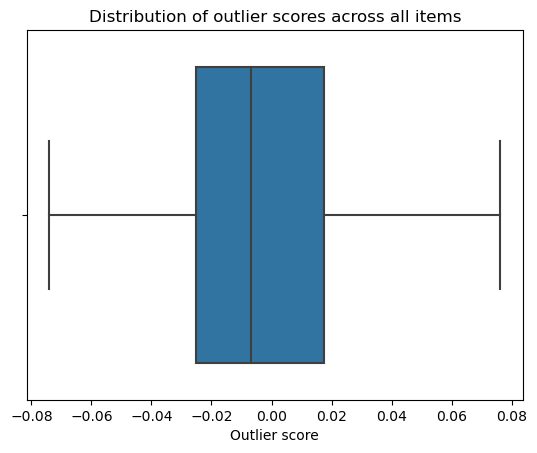

In [121]:
sns.boxplot(x=enchanted_items['outlier_score'])

plt.title('Distribution of outlier scores across all items')
plt.xlabel('Outlier score')

## Q20 - Imputation Imbroglio <a class="anchor" id="chapter20"></a>

Question: Welcome to Imputation Imbroglio! You are given a dataset of mystical potions and their unique attributes. Each potion has various properties, and some of these properties have missing values. Your task is to handle these missing values to answer the following questions:

1. Impute the missing values using the mean for numeric attributes.
2. Impute the missing values using the most frequent value for categorical attributes.
3. Calculate the mean and median of each numeric attribute after imputation.
4. Determine the most common value for each categorical attribute after imputation.
5. Create visualizations to compare the distribution of attributes before and after imputation.

Datasets:

mystical_potions: Contains columns (potion_id, potion_name, type, potency, color, viscosity, rarity).

In [122]:
# Seed for reproducibility
np.random.seed(2020)

# Generate synthetic data
potion_ids = np.arange(1, 21)
potion_names = [f'Potion_{i}' for i in potion_ids]
types = ['Healing', 'Mana', 'Strength', 'Speed', 'Invisibility']
colors = ['Red', 'Blue', 'Green', 'Yellow', 'Purple']
attributes = {
    'potency': np.random.randint(1, 101, size=20).astype(float),
    'viscosity': np.random.uniform(0.1, 1.0, size=20).astype(float),
    'rarity': np.random.randint(1, 11, size=20).astype(float)
}

data = []
for potion_id, potion_name in zip(potion_ids, potion_names):
    type_ = np.random.choice(types)
    color = np.random.choice(colors)
    potency = attributes['potency'][potion_id - 1] if np.random.rand() > 0.1 else np.nan  # Introduce some NaNs
    viscosity = attributes['viscosity'][potion_id - 1] if np.random.rand() > 0.1 else np.nan  # Introduce some NaNs
    rarity = attributes['rarity'][potion_id - 1] if np.random.rand() > 0.1 else np.nan  # Introduce some NaNs
    data.append([potion_id, potion_name, type_, potency, color, viscosity, rarity])

# Create DataFrame
mystical_potions = pd.DataFrame(data, columns=['potion_id', 'potion_name', 'type', 'potency', 'color', 'viscosity', 'rarity'])

# Display the dataset
print("Mystical Potions DataFrame:")
print(mystical_potions.head(5))

Mystical Potions DataFrame:
   potion_id potion_name      type  potency   color  viscosity  rarity
0          1    Potion_1      Mana     97.0    Blue   0.762692     8.0
1          2    Potion_2   Healing      9.0   Green   0.420097     2.0
2          3    Potion_3     Speed     68.0     Red   0.406984     1.0
3          4    Potion_4     Speed     68.0  Purple        NaN     3.0
4          5    Potion_5  Strength      NaN   Green   0.295391     9.0


### Question 20.1: Impute the missing values using the mean for numeric attributes.

In [123]:
# an unaltered copy to use for comparison in question 20.5
mystical_potions_copy = mystical_potions


numeric_columns = ['potency', 'viscosity', 'rarity']

imputer = SimpleImputer(strategy='mean')

mystical_potions[numeric_columns] = imputer.fit_transform(mystical_potions[numeric_columns])

mystical_potions['potency'].head(5)

0    97.0000
1     9.0000
2    68.0000
3    68.0000
4    52.9375
Name: potency, dtype: float64

### Question 20.2: Impute the missing values using the most frequent value for categorical attributes.

In [124]:
categorical_columns = ['type', 'color']

imputer = SimpleImputer(strategy='most_frequent')

mystical_potions[categorical_columns] = imputer.fit_transform(mystical_potions[categorical_columns])

mystical_potions.isnull().sum()

potion_id      0
potion_name    0
type           0
potency        0
color          0
viscosity      0
rarity         0
dtype: int64

### Question 20.3: Calculate the mean and median of each numeric attribute after imputation.

In [125]:
print(f"Mean numeric attributes: \n{mystical_potions[numeric_columns].mean()}\n")
print(f"Median numeric attributes: \n{mystical_potions[numeric_columns].median()}")

Mean numeric attributes: 
potency      52.937500
viscosity     0.504048
rarity        5.950000
dtype: float64

Median numeric attributes: 
potency      52.937500
viscosity     0.504048
rarity        6.500000
dtype: float64


### Question 20.4: Determine the most common value for each categorical attribute after imputation.

In [126]:
mystical_potions[categorical_columns].mode().iloc[0]

type      Mana
color    Green
Name: 0, dtype: object

### Question 20.5: Create visualizations to compare the distribution of attributes before and after imputation.

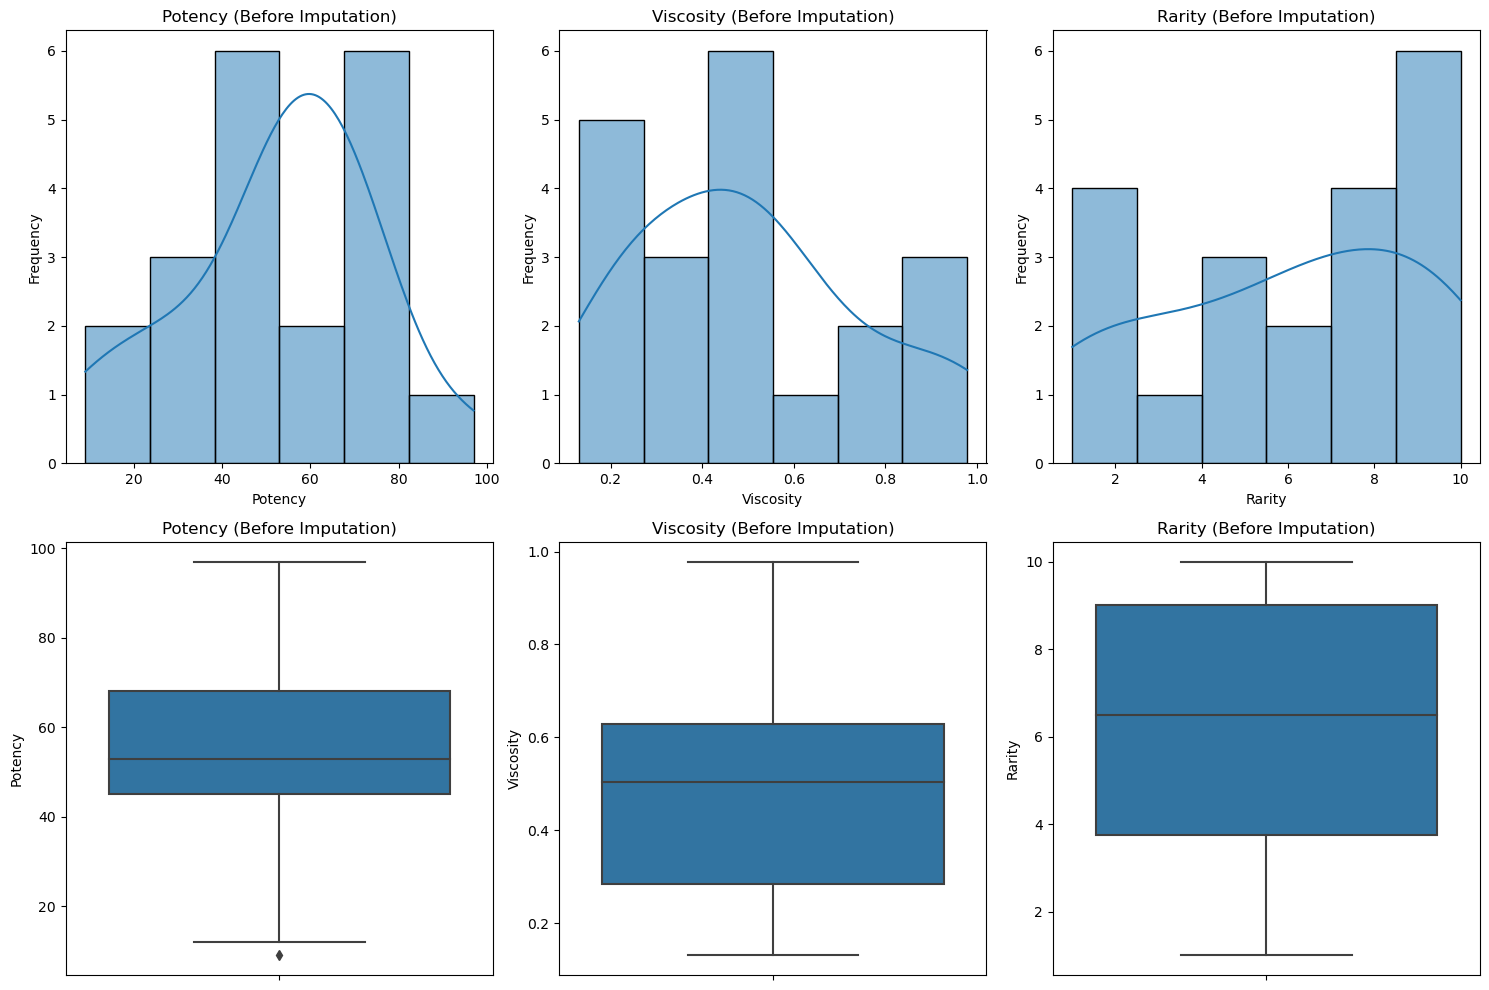

In [127]:
plt.figure(figsize=(15, 10))

# Histograms before imputation
for i, col in enumerate(['potency', 'viscosity', 'rarity']):
    plt.subplot(2, 3, i + 1)
    sns.histplot(mystical_potions[col].dropna(), kde=True)
    plt.title(f'{col.capitalize()} (Before Imputation)')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')

# Box plots before imputation
for i, col in enumerate(['potency', 'viscosity', 'rarity']):
    plt.subplot(2, 3, i + 4)
    sns.boxplot(y=mystical_potions[col].dropna())
    plt.title(f'{col.capitalize()} (Before Imputation)')
    plt.ylabel(col.capitalize())

plt.tight_layout()
plt.show()

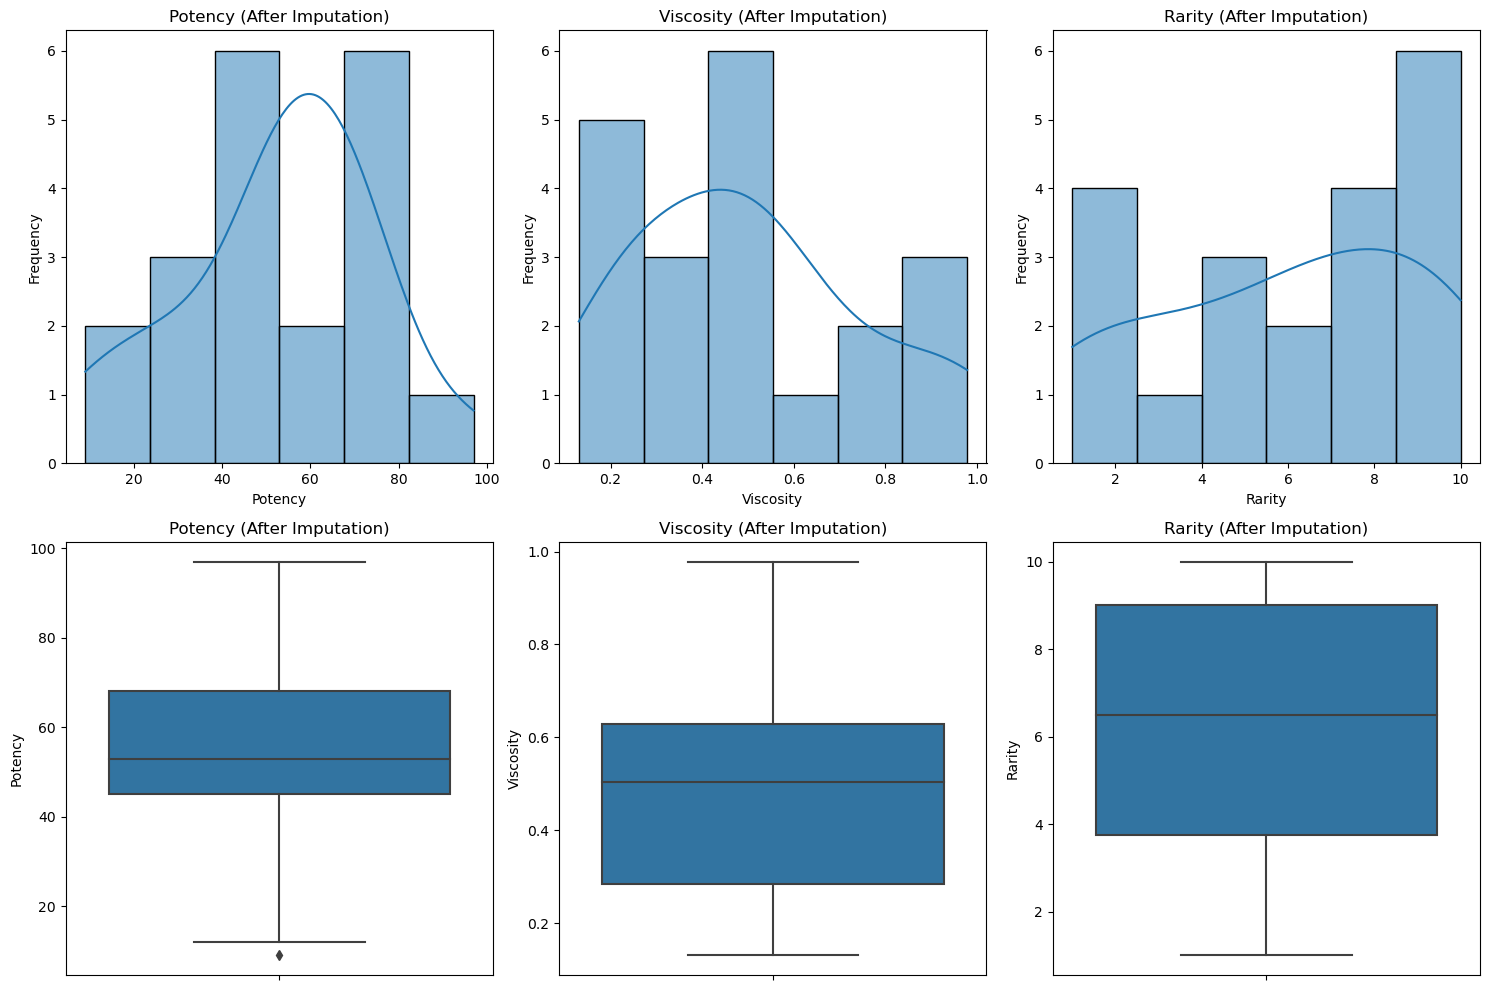

In [128]:
plt.figure(figsize=(15, 10))

# Histograms after imputation
for i, col in enumerate(['potency', 'viscosity', 'rarity']):
    plt.subplot(2, 3, i + 1)
    sns.histplot(mystical_potions[col], kde=True)
    plt.title(f'{col.capitalize()} (After Imputation)')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')

# Box plots after imputation
for i, col in enumerate(['potency', 'viscosity', 'rarity']):
    plt.subplot(2, 3, i + 4)
    sns.boxplot(y=mystical_potions[col])
    plt.title(f'{col.capitalize()} (After Imputation)')
    plt.ylabel(col.capitalize())

plt.tight_layout()
plt.show()